<a href="https://colab.research.google.com/github/rominicky/diplocssoccomp/blob/main/trabajo_final_TBC2019al2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRABAJO INTEGRADOR
# DIPLOMATURA EN CIENCIAS SOCIALES COMPUTACIONALES
#### Estudiantes:
- Romina De León
- Magali Wettstein

In [2]:
!pip install seaborn
!pip install scikit-learn
!pip install KMeans
!pip install geopandas
!pip install contextily
!pip install openpyxl

In [3]:
import requests
import contextily as ctx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import geopandas as gpd

## Resumen
El presente informe tiene por objetivo presentar una evaluación actualizada de la notificación de casos de Tuberculosis (TB) en Argentina durante el período 2019-2021.
La información utilizada es resultante de la comunicación de casos mediante el Sistema Nacional de Vigilancia de la Salud (SNVS 2.0, https://sisa.msal.gov.ar/sisa/#sisa). Desde dicho sitio se genera un reporte individual por parte de los servicios de salud a lo largo y ancho del país, de manera remota e inmediata.

## Material
Para el presente análisis se descargó el informe de reportes al 31 de agosto de 2023 del SNVS 2.0 (*ACA DEBEMOS AGREGAR EL URL*), con los casos registrados y validados de 24 jurisdicciones argentinas entre los años 2019 y 2021.
Asimismo, como el archivo no era descargable directamente de URL, se subió al repositorio GitHub de una de las estudiantes, para generar un trabajo colaborativo más sencillo, que permite generar cambios y mantener actualizado el seguimiento de los progresos. De igual manera, se añadió el código de esta Notebook y con su respectivo acceso a Google Colab.

## Código para el análisis de la Base de Datos
### Carga de datos

1. Se carga el conjunto de datos desde un archivo Excel alojado en un repositorio de GitHub, como primer paso se asigna la variable, y luego se procede a la lectura del archivo y su transformación en DataFrame.
2. Se observa las primeras filas del dataframe.

In [5]:
# Cargar el conjunto de datos
fileurl = 'https://github.com/rominicky/ro_dl/raw/main/TBC-NOTIFICACION_2019al2021.xlsx'

In [6]:
df = pd.read_excel(fileurl)

In [7]:
df.head(10)

,ID_EVENTO,FECHA_APERTURA,SEPI_APERTURA,FECHA_PAPEL,SEXO,NRO_DOC,FECHA_NACIMIENTO,EDAD_DIAGNOSTICO,IDPAISRESIDENCIA,PAIS_RESIDENCIA,...,MODALIDAD_TRAT,ESQUEMA,TRATAMIENTO_2,FECHA_INICIO_TRAT,FECHA_FIN_TRAT,MOTIVO_CONSULTA,CURADO_MEJORADO,FECHA_ALTA_MEDICA,SE_DECLARA_PUEBLO_INDIGENA,ETNIA
0,523546,2019-01-03,1,NaN,F,3235427,1934-03-30 00:00:00,83.0,200.0,Argentina,...,Autoadministrado,NaN,2HRZE / 7 A 10 HR,2019-01-03 00:00:00,NaT,NaN,NaN,NaT,NO,NaN
1,522904,2019-01-02,1,2019-01-02 00:00:00,F,95081135,1996-09-25 00:00:00,22.0,200.0,Argentina,...,Supervisado,NaN,2HRZ / 4HR,2018-12-20 00:00:00,NaT,NaN,NaN,NaT,NO,NaN
2,523705,2019-01-03,1,2018-12-11 00:00:00,F,3051770,1936-02-29 00:00:00,82.0,200.0,Argentina,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NO,NaN
3,530138,2019-01-21,4,2017-11-01 00:00:00,F,30787689,1984-01-08 00:00:00,33.0,200.0,Argentina,...,Supervisado,NaN,2HRZE / 4HR,2017-11-01 00:00:00,2018-06-28,NaN,NaN,NaT,NO,NaN
4,541594,2019-02-13,7,2018-10-18 00:00:00,M,23727232,1974-03-27 00:00:00,44.0,200.0,Argentina,...,Supervisado,NaN,2HRZE / 4HR,2018-10-18 00:00:00,NaT,NaN,NaN,NaT,NO,NaN
5,543489,2019-02-18,8,2019-01-30 00:00:00,F,94271199,2002-08-22 00:00:00,16.0,200.0,Argentina,...,Desconocida,NaN,2HRZE / 4HR,NaN,NaT,NaN,NaN,NaT,NaN,NaN
6,543489,2019-02-18,8,2019-01-30 00:00:00,F,94271199,2002-08-22 00:00:00,16.0,200.0,Argentina,...,Autoadministrado,NaN,2HRZE / 4HR,NaN,NaT,NaN,NaN,NaT,NaN,NaN
7,543489,2019-02-18,8,2019-01-30 00:00:00,F,94271199,2002-08-22 00:00:00,16.0,200.0,Argentina,...,Desconocida,NaN,2HRZE / 4HR,NaN,NaT,NaN,NaN,NaT,NaN,NaN
8,543489,2019-02-18,8,2019-01-30 00:00:00,F,94271199,2002-08-22 00:00:00,16.0,200.0,Argentina,...,Autoadministrado,NaN,2HRZE / 4HR,NaN,NaT,NaN,NaN,NaT,NaN,NaN
9,536838,2019-02-04,6,NaN,M,16747142,1964-06-02 00:00:00,54.0,200.0,Argentina,...,Autoadministrado,NaN,2HRZE / 4HR,2019-02-04 00:00:00,NaT,NaN,NaN,NaT,NO,NaN


### Exploración el Data Frame

Mediante la función *shape* se busca conocer:

1. Dimensión
2. Cantidad de filas y columnas
3. Nombre de columnas
4. Tipo de datos de las columnas
5. Verificación de datos nulos

In [8]:
dimension = df.shape
print("Dimension del conjunto de datos:", dimension, "\n")

#Filas
print(f'Cantidad de filas: {df.shape[0]}\n')

#Columnas
print(f'Cantidad de columnas: {df.shape[1]} \n')

# Columnas
columnas = df.columns
print("Columnas:", columnas, "\n")

# Tipos de datos de las columnas
tipos = df.dtypes
print("Tipos de datos:", tipos, "\n")

#Info de datos nulos
nulos = df.info()
print("Valores Nulos:", nulos, "\n")

Dimension del conjunto de datos: (468166, 65) 

Cantidad de filas: 468166

Cantidad de columnas: 65 

Columnas: Index(['ID_EVENTO', 'FECHA_APERTURA', 'SEPI_APERTURA', 'FECHA_PAPEL', 'SEXO',
       'NRO_DOC', 'FECHA_NACIMIENTO', 'EDAD_DIAGNOSTICO', 'IDPAISRESIDENCIA',
       'PAIS_RESIDENCIA', 'ID_PROV_INDEC_RESIDENCIA', 'PROVINCIA_RESIDENCIA',
       'ID_DEPTO_INDEC_RESIDENCIA', 'DEPARTAMENTO_RESIDENCIA',
       'ID_LOC_INDEC_RESIDENCIA', 'LOCALIDAD_RESIDENCIA', 'CALLE_DOMICILIO',
       'NUMERO_DOMICILIO', 'PAIS_NACIMIENTO', 'PERS_PRIV_LIBERTAD',
       'SERVICIO_PENITENCIARIO', 'CLASIFICACION_MANUAL',
       'CLASIFICACION_AUTOMATICA', 'SEPI_SINTOMA', 'FECHA_CONSULTA',
       'SEPI_CONSULTA', 'FECHA_INICIO_SINTOMA', 'EMBARAZADA', 'INTERNADO',
       'FECHA_INTERNACION', 'ID_SNVS_SIGNO_SINTOMA', 'SIGNO_SINTOMA',
       'CLASIFICACION_EXTRAPULMONAR', 'FIS', 'SEPI_MUESTRA', 'FTM',
       'FECHA_ESTUDIO', 'DETERMINACION', 'RESULTADO', 'FECHA_RECEPCION',
       'ID_ESTABLECIMIENTO_DIAG', 

### Transformación de datos

Para poder comenzar con el análisis, fue necesario realizar transformaciones de algunos datos, como ser:

1. Conversión de fechas en formatos adecuados
2. Codificación de variables categóricas (GRUPO EDAD)
3. Eliminación de columnas irrelevantes
4. Adecuación de valores faltantes
5. Añadir nuevas columnas para los cálculos de *tiempo de demora* en que los pacientes obtienen sus resultados.

In [9]:
# Convertir la columna fechas a tipo de dato datetime y para manejar fechas fuera de rango es utilizar el argumento errors='coerce' al llamar a pd.to_datetime().
df['FECHA_DIAG'] = pd.to_datetime(df['FECHA_DIAG'], errors='coerce')
df['FECHA_PAPEL'] = pd.to_datetime(df['FECHA_PAPEL'], errors='coerce')
df['FECHA_NACIMIENTO'] = pd.to_datetime(df['FECHA_NACIMIENTO'], errors='coerce')
df['FECHA_CONSULTA'] = pd.to_datetime(df['FECHA_CONSULTA'], errors='coerce')
df['FECHA_INICIO_SINTOMA'] = pd.to_datetime(df['FECHA_INICIO_SINTOMA'], errors='coerce')
df['FECHA_INTERNACION'] = pd.to_datetime(df['FECHA_INTERNACION'], errors='coerce')
df['FIS'] = pd.to_datetime(df['FIS'], errors='coerce')
df['FTM'] = pd.to_datetime(df['FTM'], errors='coerce')
df['FECHA_ESTUDIO'] = pd.to_datetime(df['FECHA_ESTUDIO'], errors='coerce')
df['FECHA_RECEPCION'] = pd.to_datetime(df['FECHA_RECEPCION'], errors='coerce')
df['FECHA_DIAG'] = pd.to_datetime(df['FECHA_DIAG'], errors='coerce')
df['FECHA_INICIO_TRAT'] = pd.to_datetime(df['FECHA_INICIO_TRAT'], errors='coerce')
df['FECHA_FIN_TRAT'] = pd.to_datetime(df['FECHA_FIN_TRAT'], errors='coerce')

In [10]:
# Reemplazar los valores faltantes en 'FECHA_DIAG' con los de 'FTM'
df['FECHA_DIAG'].fillna(df['FTM'], inplace=True)

# Reemplazar los valores faltantes en 'FECHA_DIAG' con los de 'FECHA_ESTUDIO'
df['FECHA_DIAG'].fillna(df['FECHA_ESTUDIO'], inplace=True)

# Reemplazar los valores faltantes en 'FECHA_DIAG' con los de 'FECHA_INICIO_TRAT'
df['FECHA_DIAG'].fillna(df['FECHA_INICIO_TRAT'], inplace=True)

# Ahora 'FECHA_DIAG' contiene los valores de 'FTM', 'FECHA_ESTUDIO' o 'FECHA_INICIO_TRAT' en ese orden de prioridad

# Reemplazar los valores faltantes en 'FECHA_PAPEL' (Considerada como fecha de notificacion) con los de 'FECHA_APERTURA' (Fecha en que se cargo el caso al SISA)
df['FECHA_PAPEL'].fillna(df['FECHA_APERTURA'], inplace=True)

Al tener en cuenta que la eliminación de valores faltantes puede generar pérdida de información, por la posible existencia de datos relevantes en las filas eliminadas, se determinó que la opción más pertinente sería la de reemplazar esos valores con una estimación basada en los datos existentes. Por ejemplo, usar la media, la mediana o algún otro método de imputación.

In [11]:
# Imputar los valores faltantes en 'EDAD_DIAGNOSTICO' con la mediana
median_age = df['EDAD_DIAGNOSTICO'].median()
df['EDAD_DIAGNOSTICO'].fillna(median_age, inplace=True)


Posteriormente se realizó un ordenamiento, en forma ascendente del dataframe, así como la eliminación de datos duplicados.


In [12]:
# Ordenar el DataFrame por 'FECHA_PAPEL' de manera ascendente
df.sort_values(by='FECHA_PAPEL', ascending=True, inplace=True)

# Eliminar duplicados basados en todas las columnas excepto 'FECHA_PAPEL' ya que el caso pudo enfermarse mas de una vez
df.drop_duplicates(subset=df.columns.difference(['FECHA_PAPEL']), keep='first', inplace=True)


### Selección de datos

Para limitar la base de datos y realizar un análisis dentro del contexto de la pandemia Covid-19, se tuvo en cuenta las fechas limitadas por el inicio del Aislamiento Social Preventivo y Obligatorio (ASPO) dictado en el Decreto N° 297/2020, DECNU-2020-297-APN-PTE - Disposiciones, publicado en https://www.boletinoficial.gob.ar/detalleAviso/primera/227042/20200320. Allí el artículo segundo determinaba "Durante la vigencia del 'aislamiento social, preventivo y obligatorio', las personas deberán permanecer en sus residencias habituales o en la residencia en que se encuentren a las 00:00 horas del día 20 de marzo de 2020, momento de inicio de la medida dispuesta".

Por ello, se creo una nueva variable clasificatoria de casos, etiquetados todos con **Antes**  y **Después** de la pandemia; el objetivo principal de esta clasificación fue la de comparar grupos etáreos y regionales, respecto a las caracteristicas de los casos así como de los tiempos de demora (diagnóstico, tratamiento).

In [13]:
# Fecha de inicio de la pandemia
fecha_inicio_pandemia = pd.to_datetime('2020-03-20')

# Nueva columna llamada 'CLASIFICACION_PANDEMIA'
# con valores 'Antes' para fechas anteriores a la pandemia y 'Despues' para fechas posteriores o durante la pandemia
df['CLASIFICACION_PANDEMIA'] = df['FECHA_PAPEL'].apply(lambda x: 'Antes' if x < fecha_inicio_pandemia else 'Despues')


### Limpieza del dataframe
Se verificó que el dataframe posee duplicados ya que cada durante la carga de datos se consideran como tomas individuales de muestra las enviadas para confirmar el evento, las de control del tratamiento, así como si el paciente tiene más de una comorbilidad. Por ello, se decidió eliminar duplicados y retener unicamente casos por Documento Nacional de Identidad (DNI) y por fecha de notificación del caso.

In [14]:
#Eliminamos los duplicados segun numero de DNI y fecha en la que se notifico el caso
base= df.drop_duplicates(subset=['NRO_DOC', 'FECHA_PAPEL'])

Se compueba la diferencia de dimensión respecto al dataframe inicial.

In [15]:
dimension = base.shape
print("Dimension del conjunto de datos:", dimension, "\n")

Dimension del conjunto de datos: (37596, 66) 



### Acotación de datos
Se procede a delimitar la base de datos con las fechas mencionadas relacionadas a la pandemia de COVID-19.

In [16]:
# Extrae el año de notificación
base['ANIO_NOTIFICACION'] = pd.to_datetime(base['FECHA_PAPEL']).dt.year

# Nos quedamos solo con los años 2019-2020-2021
base = base.query('ANIO_NOTIFICACION in [2019, 2020, 2021]')

C:\Users\RominaSoledadDeLeon\AppData\Local\Temp\ipykernel_12316\1583826920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['ANIO_NOTIFICACION'] = pd.to_datetime(base['FECHA_PAPEL']).dt.year


### Agrupamiento de datos
Para realizar visualizaciones más pertinentes se generó una nueva columna con *grupo de edad* que permite catalogar las edades, para ello se crearon rangos etáreos, de 0 a 18 años, de 19 a 30 años, de 31 a 45 años, de 46 a 60 años, y mayores de 61. 

In [17]:
# límites de los rangos de edad
rangos_edad = [0, 18, 30, 45, 60, float('inf')]

# etiquetas para los grupos de edad
etiquetas_edad = ['0-18', '19-30', '31-45', '46-60', '61+']

# CreaR columna 'GRUPO_EDAD' utilizando la función cut para agrupar las edades
base['GRUPO_EDAD'] = pd.cut(df['EDAD_DIAGNOSTICO'], bins=rangos_edad, labels=etiquetas_edad)

In [18]:
base.head(10)

,ID_EVENTO,FECHA_APERTURA,SEPI_APERTURA,FECHA_PAPEL,SEXO,NRO_DOC,FECHA_NACIMIENTO,EDAD_DIAGNOSTICO,IDPAISRESIDENCIA,PAIS_RESIDENCIA,...,FECHA_INICIO_TRAT,FECHA_FIN_TRAT,MOTIVO_CONSULTA,CURADO_MEJORADO,FECHA_ALTA_MEDICA,SE_DECLARA_PUEBLO_INDIGENA,ETNIA,CLASIFICACION_PANDEMIA,ANIO_NOTIFICACION,GRUPO_EDAD
34298,561497,2019-04-01,14,2019-01-01,M,16366442,1963-01-06,55.0,200.0,Argentina,...,2019-01-10,NaT,NaN,SI,2019-12-23,NO,NaN,Antes,2019,46-60
420640,576578,2019-05-02,18,2019-01-01,F,57057179,2018-07-09,0.0,200.0,Argentina,...,NaT,NaT,NaN,NaN,NaT,NO,NaN,Antes,2019,NaN
455977,630149,2019-08-09,32,2019-01-01,F,32747215,1987-09-05,31.0,200.0,Argentina,...,2019-01-07,2019-08-09,NaN,SI,2019-08-09,NO,NaN,Antes,2019,31-45
30775,578403,2019-05-07,19,2019-01-01,F,94620094,1983-05-06,35.0,200.0,Argentina,...,2018-10-30,2019-11-06,NaN,ND,NaT,NO,NaN,Antes,2019,31-45
458750,632744,2019-08-14,33,2019-01-01,F,25099300,1976-08-20,42.0,200.0,Argentina,...,2019-01-08,2019-10-16,Sintomático Respiratorio,SI,2019-10-16,NO,NaN,Antes,2019,31-45
420798,541171,2019-02-13,7,2019-01-01,M,40178300,1992-01-23,26.0,200.0,Argentina,...,2019-01-07,NaT,NaN,NaN,NaT,NO,NaN,Antes,2019,19-30
20773,564971,2019-04-08,15,2019-01-01,M,94400713,1998-09-20,20.0,200.0,Argentina,...,NaT,NaT,NaN,NaN,NaT,NO,NaN,Antes,2019,19-30
44174,614850,2019-07-16,29,2019-01-01,F,18824808,1980-04-14,38.0,200.0,Argentina,...,NaT,NaT,NaN,NaN,NaT,NaN,NaN,Antes,2019,31-45
49275,609924,2019-07-04,27,2019-01-01,M,93715886,1966-04-23,52.0,200.0,Argentina,...,2019-01-03,NaT,NaN,NaN,NaT,NaN,NaN,Antes,2019,46-60
463326,541079,2019-02-13,7,2019-01-01,NaN,900437190,NaT,33.0,200.0,Argentina,...,2019-01-02,NaT,NaN,NaN,NaT,NaN,NaN,Antes,2019,31-45


### Ajuste de las variables tiempo de demora y tiempo de demora del tratamiento 
El tiempo de demora se calcula mediante la diferencia entre las fechas de inicio de síntomas y fecha de diagnóstico, mientras que para tiempo de demora del tratamiento se cuantifica entre fecha de inicio del tratamiento y la finalización del mismo.
A continuación, para no tener valores negativos, que pueden deberse a errores de cálculo o en la carga de datos, se determina la media de los valores positivos, y con este se sustituyen a los negativos.

In [19]:
# Calcula el tiempo de demora en días
# primero diferencia entre 'FECHA_DIAG' y 'FECHA_INICIO_SINTOMA'
base['TIEMPO_DEMORA'] = (base['FECHA_DIAG'] - base['FECHA_INICIO_SINTOMA']).dt.days
base['TIEMPO_DEMORA_TTO'] = (base['FECHA_FIN_TRAT'] - base['FECHA_INICIO_TRAT']).dt.days

# ahora se calcula la media de los valores positivos
media_tiempo_demora = base[base['TIEMPO_DEMORA'] >= 0]['TIEMPO_DEMORA'].mean()
media_tiempo_demora_tto = base[base['TIEMPO_DEMORA_TTO'] >= 0]['TIEMPO_DEMORA_TTO'].mean()
# los valores negativos se reemplazan por la media
base['TIEMPO_DEMORA'] = base['TIEMPO_DEMORA'].apply(lambda x: x if x >= 0 else media_tiempo_demora)
base['TIEMPO_DEMORA_TTO'] = base['TIEMPO_DEMORA_TTO'].apply(lambda x: x if x >= 0 else media_tiempo_demora_tto)

In [20]:
print(base['TIEMPO_DEMORA'].head())

34298     333.000000
420640     37.292168
455977     37.292168
30775      18.000000
458750     37.292168
Name: TIEMPO_DEMORA, dtype: float64


In [21]:
print(base['TIEMPO_DEMORA_TTO'].head())

34298     205.454299
420640    205.454299
455977    214.000000
30775     372.000000
458750    281.000000
Name: TIEMPO_DEMORA_TTO, dtype: float64



## Análisis descriptivo

En este análisis descriptivo se realizaron:

- Resumen estadístico de variables numéricas (edad, tiempo de diagnóstico, etc.).
- Distribuciones de variables categóricas (sexo, país de residencia, localidad, clasificacion del caso, resultado de tratamiento etc.).
- Gráficos de dispersión para identificar tendencias.
- Histogramas para visualizar la distribución de edades de diagnóstico antes y después de la pandemia.
- Box plots para identificar valores atípicos.
- Análisis de correlación para determinar relaciones entre variables.

#### Descripción de:
1. Variables tipo objeto
2. Cantidad de filas que poseen conteo (count)
3. Cantidad de valores únicos dentro de cada variable (unique)
4. Categoría más frecuente, cantidad de ocurrencias (top y freq)

In [22]:
base.describe(include=['O'])


,SEXO,NRO_DOC,PAIS_RESIDENCIA,PROVINCIA_RESIDENCIA,ID_DEPTO_INDEC_RESIDENCIA,DEPARTAMENTO_RESIDENCIA,ID_LOC_INDEC_RESIDENCIA,LOCALIDAD_RESIDENCIA,CALLE_DOMICILIO,NUMERO_DOMICILIO,...,RESULTADO_TRATAMIENTO,CLASIF_INICIO_TRAT,MODALIDAD_TRAT,ESQUEMA,TRATAMIENTO_2,MOTIVO_CONSULTA,CURADO_MEJORADO,SE_DECLARA_PUEBLO_INDIGENA,ETNIA,CLASIFICACION_PANDEMIA
count,36391,36448,34565,36302,36448,35281,36202,36202,34753,28725,...,29590,28857,29590,1187,29590,1795,6691,11701,202,36448
unique,4,34031,5,25,484,409,1348,1576,19631,5733,...,7,6,4,862,6,4,3,2,14,2
top,M,24730799,Argentina,Buenos Aires,6427,Capital,,*SIN DATO* (*SIN DATO*),0,0,...,Tratamiento completo,Nuevo,Autoadministrado,3HZRSE/5HRE,2HRZE / 4HR,Sintomático Respiratorio,SI,NO,Wichí,Despues
freq,20503,6,34552,18848,2176,2774,9718,9718,332,4638,...,11404,25333,14084,48,18917,1492,4426,11413,70,20377


## ESTO SE ELIMINA o NO? porque si miro la descripcion tengo valores negativos, si miro luego de que se eliminan valores atipicos y negativos, ya no aparecen, entonces tengo dudas si antes estaban bien eliminados?

In [23]:
# estadísticas descriptivas
descripcion = base[['TIEMPO_DEMORA', 'EDAD_DIAGNOSTICO', 'TIEMPO_DEMORA_TTO']].describe()

print(descripcion)

       TIEMPO_DEMORA  EDAD_DIAGNOSTICO  TIEMPO_DEMORA_TTO
count   36448.000000      36448.000000       36448.000000
mean       37.292168         37.117208         205.454299
std       281.478162         21.554296         102.475778
min         0.000000       -944.000000           0.000000
25%         0.000000         23.000000         205.454299
50%        37.292168         34.000000         205.454299
75%        37.292168         50.000000         205.454299
max     43851.000000        919.000000        9919.000000


In [24]:
# Contar cuántos valores negativos hay en 'TIEMPO_DEMORA'
valores_negativos_tiempo = (base['TIEMPO_DEMORA'] < 0).sum()

# Contar cuántos valores negativos hay en 'EDAD'
valores_negativos_edad = (base['EDAD_DIAGNOSTICO'] < 0).sum()

# Contar cuántos valores mayores de 90 años hay en 'EDAD'
valores_negativos_edad_90 = (base['EDAD_DIAGNOSTICO'] > 90).sum()

# Contar cuántos valores extremos tiempo demora diagnostico 365 días
valores_demora_emayor_365 = (base['TIEMPO_DEMORA'] > 365).sum()

# Contar cuántos valores extremos tiempo demora diagnostico 365 días
valores_demora_tratamiento_365 = (base['TIEMPO_DEMORA_TTO'] > 365).sum()

print(f'Valores negativos en TIEMPO_DEMORA: {valores_negativos_tiempo}')
print(f'Valores negativos en EDAD: {valores_negativos_edad}')
print(f'Valores negativos en EDAD mayor a 90: {valores_negativos_edad_90}')
print(f'Valores negativos en demora diagnostico mayor 365: {valores_demora_emayor_365}')
print(f'Valores negativos demora completar tto mayor a 365: {valores_demora_tratamiento_365}')

Valores negativos en TIEMPO_DEMORA: 0
Valores negativos en EDAD: 8
Valores negativos en EDAD mayor a 90: 39
Valores negativos en demora diagnostico mayor 365: 378
Valores negativos demora completar tto mayor a 365: 1096


Eliminamos valores atipicos y negativos

In [25]:
base = base.drop(base[base['EDAD_DIAGNOSTICO'] > 90].index)
base = base.drop(base[base['EDAD_DIAGNOSTICO'] < 0].index)
base = base.drop(base[base['TIEMPO_DEMORA'] > 365].index)
base = base.drop(base[base['TIEMPO_DEMORA_TTO'] > 365].index)

In [26]:
dimension = base.shape
print("Dimension del conjunto de datos:", dimension, "\n")


Dimension del conjunto de datos: (34951, 70) 



Volvemos a ralizar un analisis descriptivo de las variables cuantitativas sin valores atipicos y negativos

In [27]:
# estadísticas descriptivas
descripcion = base[['TIEMPO_DEMORA', 'EDAD_DIAGNOSTICO', 'TIEMPO_DEMORA_TTO']].describe()

print(descripcion)

       TIEMPO_DEMORA  EDAD_DIAGNOSTICO  TIEMPO_DEMORA_TTO
count   34951.000000      34951.000000       34951.000000
mean       28.487777         37.153844         197.073598
std        37.651860         18.717579          59.286628
min         0.000000          0.000000           0.000000
25%         0.000000         23.000000         205.000000
50%        37.292168         34.000000         205.454299
75%        37.292168         51.000000         205.454299
max       365.000000         90.000000         365.000000


In [28]:
# esto para verificar que los cambios en edad se aplicaron correctamente
valores_negativos_edad = base[base['EDAD_DIAGNOSTICO'] > 91]
valores_negativos_edad

,ID_EVENTO,FECHA_APERTURA,SEPI_APERTURA,FECHA_PAPEL,SEXO,NRO_DOC,FECHA_NACIMIENTO,EDAD_DIAGNOSTICO,IDPAISRESIDENCIA,PAIS_RESIDENCIA,...,MOTIVO_CONSULTA,CURADO_MEJORADO,FECHA_ALTA_MEDICA,SE_DECLARA_PUEBLO_INDIGENA,ETNIA,CLASIFICACION_PANDEMIA,ANIO_NOTIFICACION,GRUPO_EDAD,TIEMPO_DEMORA,TIEMPO_DEMORA_TTO


In [29]:
# Compruebo si se realizo bien el cambio
valores_negativos = base[base['EDAD_DIAGNOSTICO'] < 0]

# Hago un if para que se actualizo bien
if valores_negativos.empty:
    print("Todos los valores negativos en 'EDAD_DIAGNOSTICO' se han actualizado correctamente.")
else:
    print("Aún quedan valores negativos en 'EDAD_DIAGNOSTICO'. Revisa la actualización.")


Todos los valores negativos en 'EDAD_DIAGNOSTICO' se han actualizado correctamente.


In [30]:
base.head(10)

,ID_EVENTO,FECHA_APERTURA,SEPI_APERTURA,FECHA_PAPEL,SEXO,NRO_DOC,FECHA_NACIMIENTO,EDAD_DIAGNOSTICO,IDPAISRESIDENCIA,PAIS_RESIDENCIA,...,MOTIVO_CONSULTA,CURADO_MEJORADO,FECHA_ALTA_MEDICA,SE_DECLARA_PUEBLO_INDIGENA,ETNIA,CLASIFICACION_PANDEMIA,ANIO_NOTIFICACION,GRUPO_EDAD,TIEMPO_DEMORA,TIEMPO_DEMORA_TTO
34298,561497,2019-04-01,14,2019-01-01,M,16366442,1963-01-06,55.0,200.0,Argentina,...,NaN,SI,2019-12-23,NO,NaN,Antes,2019,46-60,333.000000,205.454299
420640,576578,2019-05-02,18,2019-01-01,F,57057179,2018-07-09,0.0,200.0,Argentina,...,NaN,NaN,NaT,NO,NaN,Antes,2019,NaN,37.292168,205.454299
455977,630149,2019-08-09,32,2019-01-01,F,32747215,1987-09-05,31.0,200.0,Argentina,...,NaN,SI,2019-08-09,NO,NaN,Antes,2019,31-45,37.292168,214.000000
458750,632744,2019-08-14,33,2019-01-01,F,25099300,1976-08-20,42.0,200.0,Argentina,...,Sintomático Respiratorio,SI,2019-10-16,NO,NaN,Antes,2019,31-45,37.292168,281.000000
420798,541171,2019-02-13,7,2019-01-01,M,40178300,1992-01-23,26.0,200.0,Argentina,...,NaN,NaN,NaT,NO,NaN,Antes,2019,19-30,37.292168,205.454299
20773,564971,2019-04-08,15,2019-01-01,M,94400713,1998-09-20,20.0,200.0,Argentina,...,NaN,NaN,NaT,NO,NaN,Antes,2019,19-30,7.000000,205.454299
44174,614850,2019-07-16,29,2019-01-01,F,18824808,1980-04-14,38.0,200.0,Argentina,...,NaN,NaN,NaT,NaN,NaN,Antes,2019,31-45,37.292168,205.454299
49275,609924,2019-07-04,27,2019-01-01,M,93715886,1966-04-23,52.0,200.0,Argentina,...,NaN,NaN,NaT,NaN,NaN,Antes,2019,46-60,0.000000,205.454299
463326,541079,2019-02-13,7,2019-01-01,NaN,900437190,NaT,33.0,200.0,Argentina,...,NaN,NaN,NaT,NaN,NaN,Antes,2019,31-45,37.292168,205.454299
217218,573145,2019-04-25,17,2019-01-02,M,17025428,1964-08-24,54.0,200.0,Argentina,...,NaN,NaN,NaT,NO,NaN,Antes,2019,46-60,0.000000,350.000000


### Visualización de datos

Los gráficos de datos, como formato ilustrada de datos analíticos, facilita la visualización, de igual manera que la toma de decisiones, permitiendo captar conceptos y patrones que no son relevados sencillamente en las grandes bases de datos.
Para ello se reajustaron algunos datos del dataframe, como ser en la columna de *Provincias de residencia* los valores CABA por Ciudad Autónoma de Buenos Aires, que será relevante para las gráficas georreferenciadas.

In [61]:
base['PROVINCIA_RESIDENCIA'] = base['PROVINCIA_RESIDENCIA'].replace('CABA', 'Ciudad Autónoma de Buenos Aires')

### Generación de gráficos y tablas para mejorar la interpretación de los datos

#### Gráfico tipo histograma que representa grupo de edad. Para ello, se realiza conteo de la columna grupo de edad.

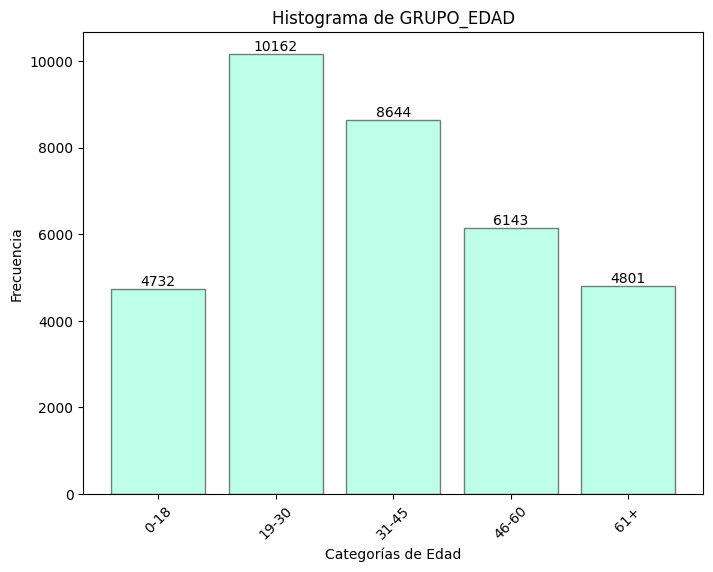

In [62]:
#conteo de datos de la columna grupo_edad
cant_grupo_edad = base['GRUPO_EDAD'].value_counts().sort_index()

# Crear el histograma de conteo
plt.figure(figsize=(8, 6))
bar = plt.bar(cant_grupo_edad.index, cant_grupo_edad.values, edgecolor='black', alpha=0.5, color='aquamarine')
plt.title('Histograma de GRUPO_EDAD')
plt.xlabel('Categorías de Edad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.bar_label(bar, fmt='%d', label_type='edge', fontsize=10, color='black')
plt.show()


#### Gráfico tipo histograma que representa edad de diagnósticos, con los mismos cortes que grupo de edad, se añaden líneas representativas de media, mediana y moda para cada grupo etáreo.

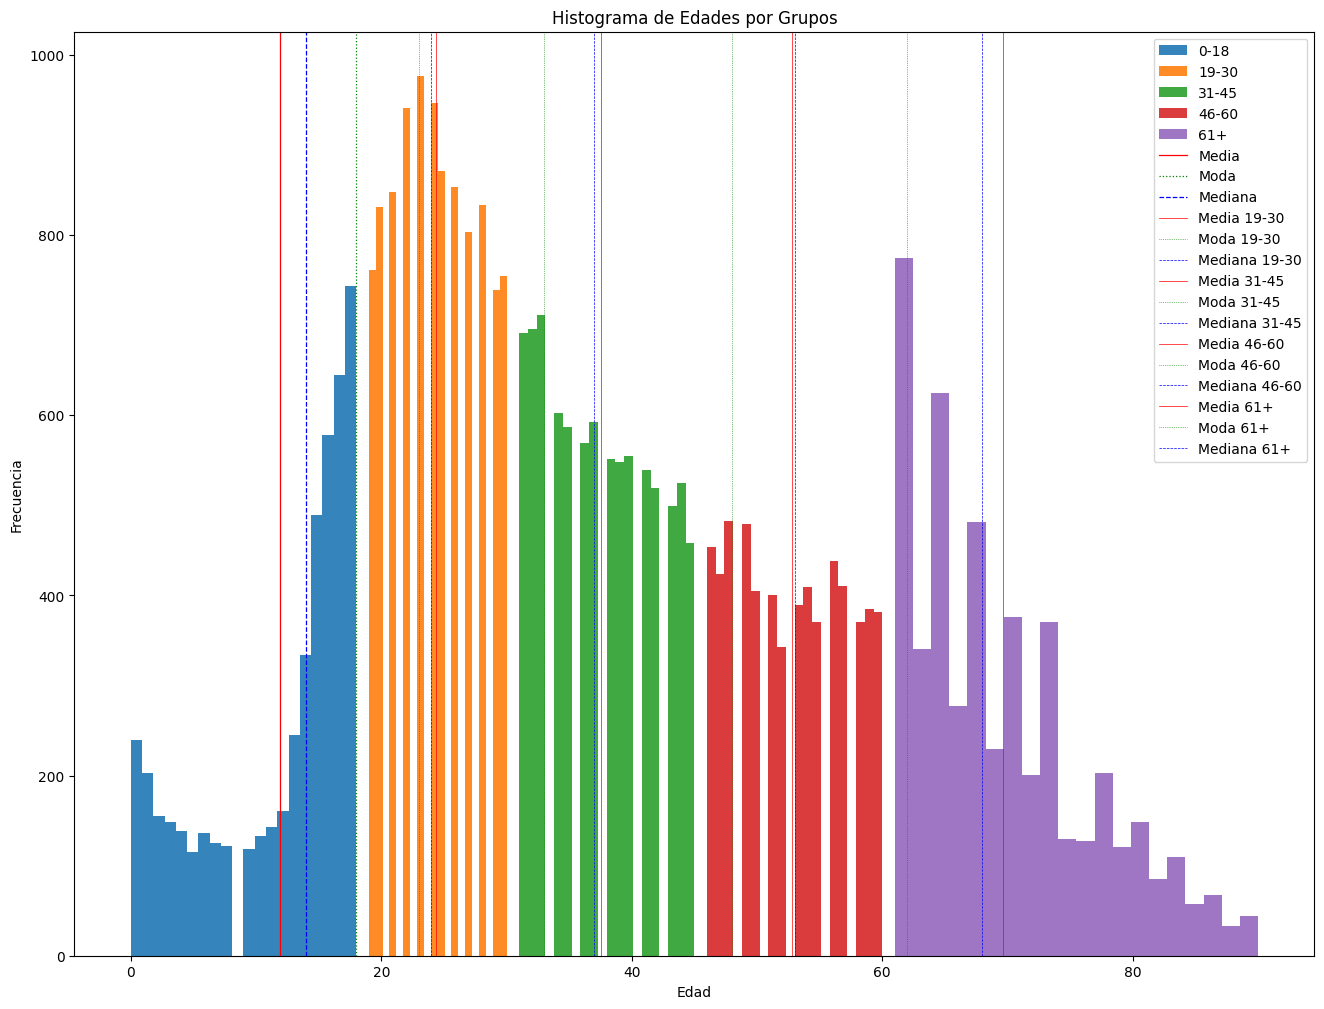

In [84]:
#Datos de columna 'EDAD_DIAGNOSTICO' s
base['EDAD_DIAGNOSTICO'] = pd.to_numeric(base['EDAD_DIAGNOSTICO'], errors='coerce')

# Subconjuntos de datos para cada categoría
edad_0_18 = base[(base['EDAD_DIAGNOSTICO'] >= 0) & (base['EDAD_DIAGNOSTICO'] <= 18)]
edad_19_30 = base[(base['EDAD_DIAGNOSTICO'] >= 19) & (base['EDAD_DIAGNOSTICO'] <= 30)]
edad_31_45 = base[(base['EDAD_DIAGNOSTICO'] >= 31) & (base['EDAD_DIAGNOSTICO'] <= 45)]
edad_46_60 = base[(base['EDAD_DIAGNOSTICO'] >= 46) & (base['EDAD_DIAGNOSTICO'] <= 60)]
edad_61 = base[(base['EDAD_DIAGNOSTICO'] >= 61)]

# Calcular la media, moda y mediana de cada categoría
media_edad_0_18 = edad_0_18['EDAD_DIAGNOSTICO'].mean()
moda_edad_0_18 = edad_0_18['EDAD_DIAGNOSTICO'].mode().values[0]
mediana_edad_0_18 = edad_0_18['EDAD_DIAGNOSTICO'].median()

media_edad_19_30 = edad_19_30['EDAD_DIAGNOSTICO'].mean()
moda_edad_19_30 = edad_19_30['EDAD_DIAGNOSTICO'].mode().values[0]
mediana_edad_19_30 = edad_19_30['EDAD_DIAGNOSTICO'].median()

media_edad_31_45 = edad_31_45['EDAD_DIAGNOSTICO'].mean()
moda_edad_31_45 = edad_31_45['EDAD_DIAGNOSTICO'].mode().values[0]
mediana_edad_31_45 = edad_31_45['EDAD_DIAGNOSTICO'].median()

media_edad_46_60 = edad_46_60['EDAD_DIAGNOSTICO'].mean()
moda_edad_46_60 = edad_46_60['EDAD_DIAGNOSTICO'].mode().values[0]
mediana_edad_46_60 = edad_46_60['EDAD_DIAGNOSTICO'].median()

media_edad_61 = edad_61['EDAD_DIAGNOSTICO'].mean()
moda_edad_61 = edad_61['EDAD_DIAGNOSTICO'].mode().values[0]
mediana_edad_61 = edad_61['EDAD_DIAGNOSTICO'].median()

# histograma por cada categoría
plt.figure(figsize=(16, 12))
plt.hist(edad_0_18['EDAD_DIAGNOSTICO'], bins=20, label='0-18', alpha=0.9)
plt.hist(edad_19_30['EDAD_DIAGNOSTICO'], bins=20, label='19-30', alpha=0.9)
plt.hist(edad_31_45['EDAD_DIAGNOSTICO'], bins=20, label='31-45', alpha=0.9)
plt.hist(edad_46_60['EDAD_DIAGNOSTICO'], bins=20, label='46-60', alpha=0.9)
plt.hist(edad_61['EDAD_DIAGNOSTICO'], bins=20, label='61+', alpha=0.9)
plt.legend()

# Líneas verticales para la media, moda y mediana
plt.axvline(media_edad_0_18, color='r', linestyle='solid', linewidth=0.9, label='Media')
plt.axvline(moda_edad_0_18, color='g', linestyle='dotted', linewidth=0.9, label='Moda')
plt.axvline(mediana_edad_0_18, color='b', linestyle='dashed', linewidth=0.9, label='Mediana')

plt.axvline(media_edad_19_30, color='r', linestyle='solid', linewidth=0.5, label='Media 19-30')
plt.axvline(moda_edad_19_30, color='g', linestyle='dotted', linewidth=0.5, label='Moda 19-30')
plt.axvline(mediana_edad_19_30, color='b', linestyle='dashed', linewidth=0.5, label='Mediana 19-30')

plt.axvline(media_edad_31_45, color='r', linestyle='solid', linewidth=0.5, label='Media 31-45')
plt.axvline(moda_edad_31_45, color='g', linestyle='dotted', linewidth=0.5, label='Moda 31-45')
plt.axvline(mediana_edad_31_45, color='b', linestyle='dashed', linewidth=0.5, label='Mediana 31-45')

plt.axvline(media_edad_46_60, color='r', linestyle='solid', linewidth=0.5, label='Media 46-60')
plt.axvline(moda_edad_46_60, color='g', linestyle='dotted', linewidth=0.5, label='Moda 46-60')
plt.axvline(mediana_edad_46_60, color='b', linestyle='dashed', linewidth=0.5, label='Mediana 46-60')

plt.axvline(media_edad_61, color='r', linestyle='solid', linewidth=0.5, label='Media 61+')
plt.axvline(moda_edad_61, color='g', linestyle='dotted', linewidth=0.5, label='Moda 61+')
plt.axvline(mediana_edad_61, color='b', linestyle='dashed', linewidth=0.5, label='Mediana 61+')

# Etiquetas y título del gráfico
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades por Grupos')
plt.legend()
plt.show()

### Se podría decir que tiene una distribución asimétrica con cola a la derecha.

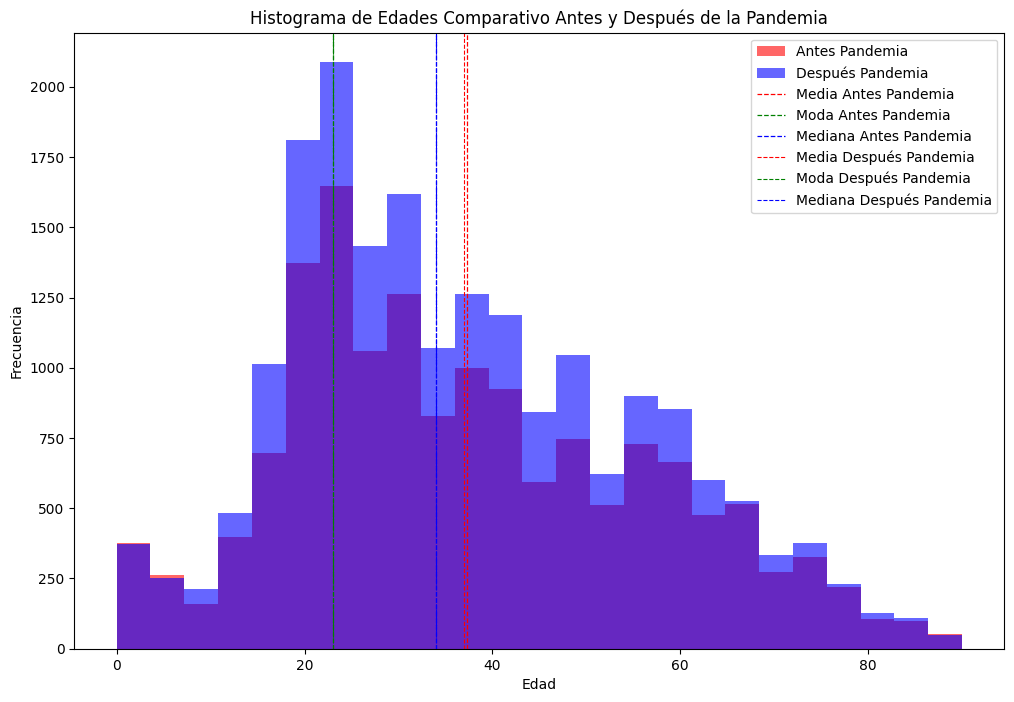

In [81]:

# Asegurarse que los valores en la columna 'EDAD_DIAGNOSTICO' sean números
base['EDAD_DIAGNOSTICO'] = pd.to_numeric(base['EDAD_DIAGNOSTICO'], errors='coerce')

# Dividir los datos en antes y después de la clasificación de la pandemia
antes_pandemia = base[base['CLASIFICACION_PANDEMIA'] == 'Antes']
despues_pandemia = base[base['CLASIFICACION_PANDEMIA'] == 'Despues']

# Crear los histogramas para cada conjunto
plt.figure(figsize=(12, 8))
plt.hist(antes_pandemia['EDAD_DIAGNOSTICO'], bins=25, label='Antes Pandemia', alpha=0.6, color='red')
plt.hist(despues_pandemia['EDAD_DIAGNOSTICO'], bins=25, label='Después Pandemia', alpha=0.6, color='blue')

# Agregar líneas verticales para la media, moda y mediana de cada conjunto si tienen datos válidos
if not antes_pandemia.empty:
    plt.axvline(antes_pandemia['EDAD_DIAGNOSTICO'].mean(), color='r', linestyle='dashed', linewidth=0.9, label='Media Antes Pandemia')
    moda_antes = antes_pandemia['EDAD_DIAGNOSTICO'].mode()
    if not moda_antes.empty:
        plt.axvline(moda_antes.values[0], color='g', linestyle='dashed', linewidth=0.9, label='Moda Antes Pandemia')
    plt.axvline(antes_pandemia['EDAD_DIAGNOSTICO'].median(), color='b', linestyle='dashed', linewidth=0.9, label='Mediana Antes Pandemia')

if not despues_pandemia.empty:
    plt.axvline(despues_pandemia['EDAD_DIAGNOSTICO'].mean(), color='r', linestyle='dashed', linewidth=0.8, label='Media Después Pandemia')
    moda_despues = despues_pandemia['EDAD_DIAGNOSTICO'].mode()
    if not moda_despues.empty:
        plt.axvline(moda_despues.values[0], color='g', linestyle='dashed', linewidth=0.8, label='Moda Después Pandemia')
    plt.axvline(despues_pandemia['EDAD_DIAGNOSTICO'].median(), color='b', linestyle='dashed', linewidth=0.8, label='Mediana Después Pandemia')

# Etiquetas y título del gráfico
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades Comparativo Antes y Después de la Pandemia')
plt.legend()
plt.show()



#### Observación:
Se puede visualizar que la media es mayor a la mediana y la moda, por lo tanto se trata de una distribución asimétrica a la derecha, que es lo que se verifica en ambos grupos, antes y después.

# Analisis de tiempo de demora en el diagnostico por grupo

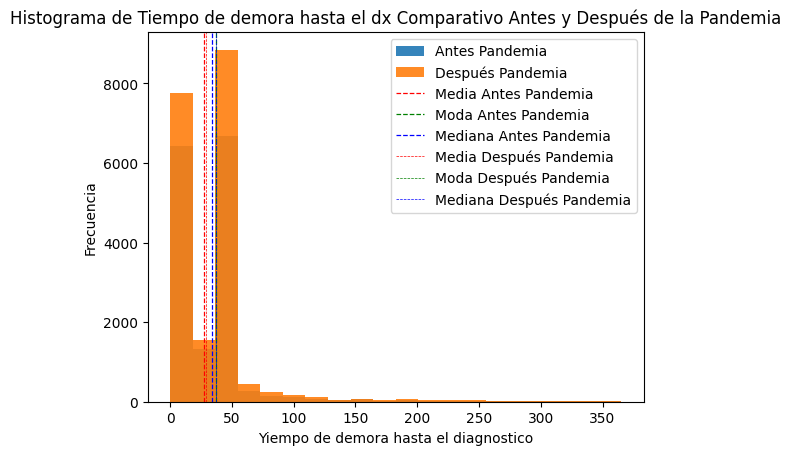

In [35]:
# Asegurarse que los valores en la columna 'EDAD_DIAGNOSTICO' sean números
base['TIEMPO_DEMORA'] = pd.to_numeric(base['TIEMPO_DEMORA'], errors='coerce')

# Dividir los datos en antes y después de la clasificación de la pandemia
antes_pandemia = base[base['CLASIFICACION_PANDEMIA'] == 'Antes']
despues_pandemia = base[base['CLASIFICACION_PANDEMIA'] == 'Despues']

# Crear los histogramas para cada conjunto
plt.hist(antes_pandemia['TIEMPO_DEMORA'], bins=20, label='Antes Pandemia', alpha=0.9)
plt.hist(despues_pandemia['TIEMPO_DEMORA'], bins=20, label='Después Pandemia', alpha=0.9)

# Agregar líneas verticales para la media, moda y mediana de cada conjunto si tienen datos válidos
if not antes_pandemia.empty:
    plt.axvline(antes_pandemia['TIEMPO_DEMORA'].mean(), color='r', linestyle='dashed', linewidth=0.9, label='Media Antes Pandemia')
    moda_antes = antes_pandemia['TIEMPO_DEMORA'].mode()
    if not moda_antes.empty:
        plt.axvline(moda_antes.values[0], color='g', linestyle='dashed', linewidth=0.9, label='Moda Antes Pandemia')
    plt.axvline(antes_pandemia['TIEMPO_DEMORA'].median(), color='b', linestyle='dashed', linewidth=0.9, label='Mediana Antes Pandemia')

if not despues_pandemia.empty:
    plt.axvline(despues_pandemia['TIEMPO_DEMORA'].mean(), color='r', linestyle='dashed', linewidth=0.5, label='Media Después Pandemia')
    moda_despues = despues_pandemia['TIEMPO_DEMORA'].mode()
    if not moda_despues.empty:
        plt.axvline(moda_despues.values[0], color='g', linestyle='dashed', linewidth=0.5, label='Moda Después Pandemia')
    plt.axvline(despues_pandemia['TIEMPO_DEMORA'].median(), color='b', linestyle='dashed', linewidth=0.5, label='Mediana Después Pandemia')

# Etiquetas y título del gráfico
plt.xlabel('Yiempo de demora hasta el diagnostico')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tiempo de demora hasta el dx Comparativo Antes y Después de la Pandemia')
plt.legend()
plt.show()


La media es menor a la mediana y la moda por lo que se espera una distribución asimétrica a la izquierda

## Tiempo demora tratamiento
se podria seleccionar solo los curados y tratamiento completo, tambien puede ser fracaso. (El tiempo de tto es de 6 meses por lo general 180 dias) los que tienen tiempos menores pueden ser fallecidos, perdidas de seguimiento, transferidos.



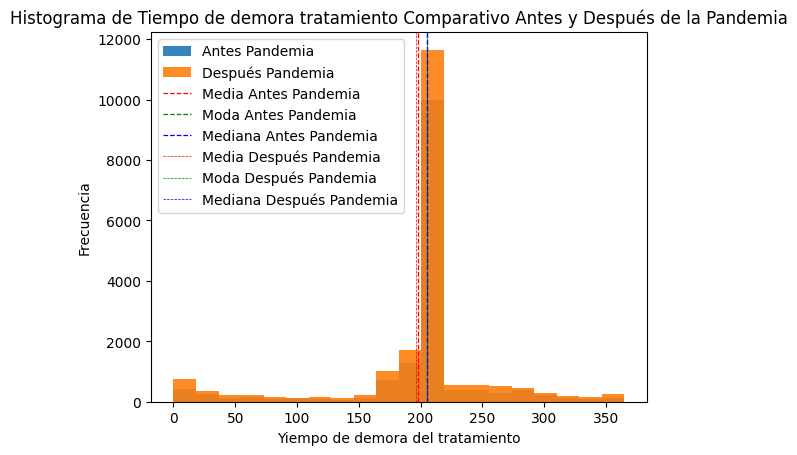

In [36]:
# Asegurarse que los valores en la columna 'EDAD_DIAGNOSTICO' sean números
base['TIEMPO_DEMORA_TTO'] = pd.to_numeric(base['TIEMPO_DEMORA_TTO'], errors='coerce')

# Dividir los datos en antes y después de la clasificación de la pandemia
antes_pandemia = base[base['CLASIFICACION_PANDEMIA'] == 'Antes']
despues_pandemia = base[base['CLASIFICACION_PANDEMIA'] == 'Despues']

# Crear los histogramas para cada conjunto
plt.hist(antes_pandemia['TIEMPO_DEMORA_TTO'], bins=20, label='Antes Pandemia', alpha=0.9)
plt.hist(despues_pandemia['TIEMPO_DEMORA_TTO'], bins=20, label='Después Pandemia', alpha=0.9)

# Agregar líneas verticales para la media, moda y mediana de cada conjunto si tienen datos válidos
if not antes_pandemia.empty:
    plt.axvline(antes_pandemia['TIEMPO_DEMORA_TTO'].mean(), color='r', linestyle='dashed', linewidth=0.9, label='Media Antes Pandemia')
    moda_antes = antes_pandemia['TIEMPO_DEMORA_TTO'].mode()
    if not moda_antes.empty:
        plt.axvline(moda_antes.values[0], color='g', linestyle='dashed', linewidth=0.9, label='Moda Antes Pandemia')
    plt.axvline(antes_pandemia['TIEMPO_DEMORA_TTO'].median(), color='b', linestyle='dashed', linewidth=0.9, label='Mediana Antes Pandemia')

if not despues_pandemia.empty:
    plt.axvline(despues_pandemia['TIEMPO_DEMORA_TTO'].mean(), color='r', linestyle='dashed', linewidth=0.5, label='Media Después Pandemia')
    moda_despues = despues_pandemia['TIEMPO_DEMORA_TTO'].mode()
    if not moda_despues.empty:
        plt.axvline(moda_despues.values[0], color='g', linestyle='dashed', linewidth=0.5, label='Moda Después Pandemia')
    plt.axvline(despues_pandemia['TIEMPO_DEMORA_TTO'].median(), color='b', linestyle='dashed', linewidth=0.5, label='Mediana Después Pandemia')

# Etiquetas y título del gráfico
plt.xlabel('Yiempo de demora del tratamiento')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tiempo de demora tratamiento Comparativo Antes y Después de la Pandemia')
plt.legend()
plt.show()


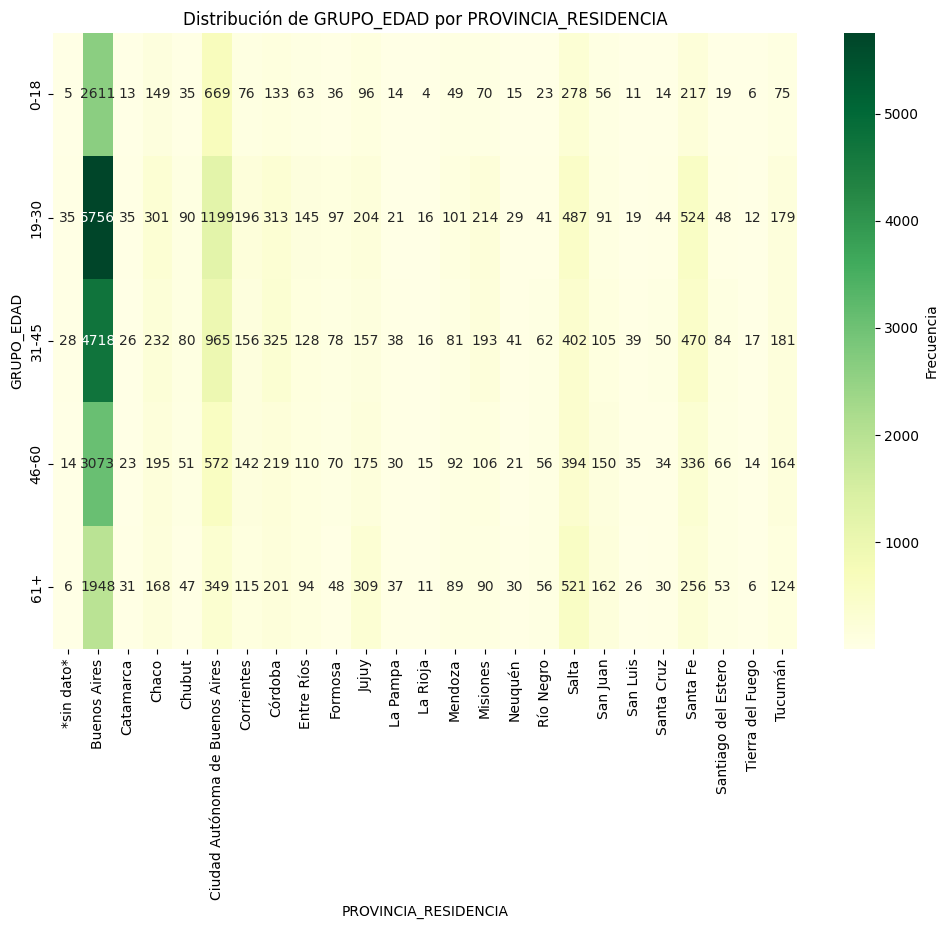

In [37]:
table = pd.crosstab(base['GRUPO_EDAD'], [base['PROVINCIA_RESIDENCIA']])

# Graficar el histograma de barras apiladas
plt.figure(figsize=(12, 8))
sns.heatmap(table, cmap='YlGn', annot=True, fmt='d', cbar=True, cbar_kws={'label': 'Frecuencia'})
plt.title('Distribución de GRUPO_EDAD por PROVINCIA_RESIDENCIA')
plt.xlabel('PROVINCIA_RESIDENCIA')
plt.ylabel('GRUPO_EDAD')

plt.show()


In [38]:
# Convierte la columna 'ANIO_NOTIFICACION' a formato datetime
base['ANIO_NOTIFICACION'] = pd.to_datetime(base['ANIO_NOTIFICACION'], format='%Y')

# Luego, puedes agrupar por año y momento de diagnóstico
tabla_agrupada = base.groupby([base['ANIO_NOTIFICACION'].dt.year, 'CLASIFICACION_PANDEMIA']).size().unstack(fill_value=0)

# Cambia los nombres de las columnas para mayor claridad
tabla_agrupada.columns = ['Antes de la pandemia', 'Después de la pandemia']

# Resetea el índice para tener una tabla con las columnas 'Año', 'Antes de la pandemia' y 'Después de la pandemia'
tabla_agrupada = tabla_agrupada.reset_index()

# Cambia el nombre de la columna del año
tabla_agrupada = tabla_agrupada.rename(columns={'ANIO_NOTIFICACION': 'Año'})

# Imprime la tabla agrupada
print(tabla_agrupada)

    Año  Antes de la pandemia  Después de la pandemia
0  2019                 12572                       0
1  2020                  2790                    7689
2  2021                     0                   11900


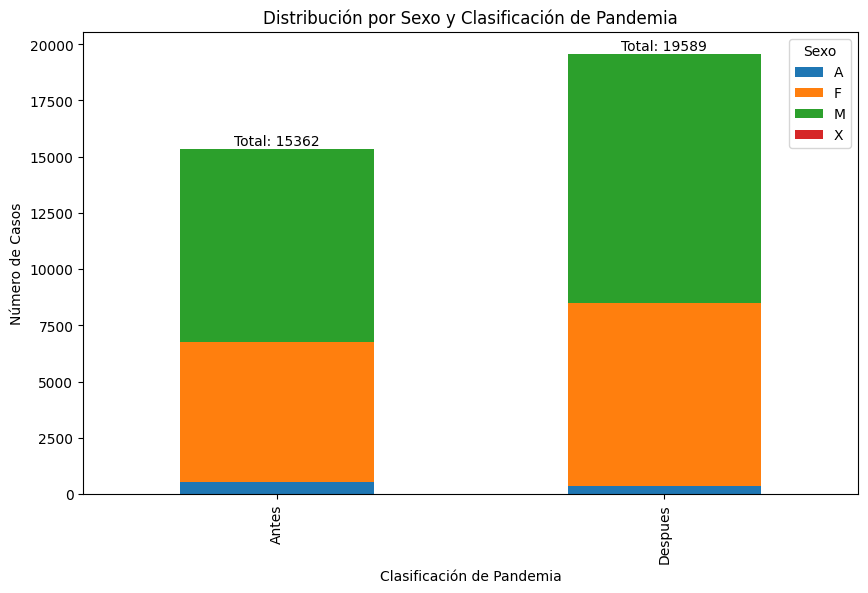

In [39]:
# Agrupa los datos por 'SEXO' y 'CLASIFICACION_PANDEMIA', y cuenta el número de casos en cada grupo
grupo_distribucion = base.groupby(['CLASIFICACION_PANDEMIA', 'SEXO']).size().unstack(fill_value=0)

# Calcula el total de casos por sexo
total_por_sexo = base.groupby('CLASIFICACION_PANDEMIA').size()

# Crea un gráfico de barras apiladas
ax = grupo_distribucion.plot(kind='bar', stacked=True, figsize=(10, 6))

# Configura las etiquetas y el título del gráfico
plt.xlabel('Clasificación de Pandemia')
plt.ylabel('Número de Casos')
plt.title('Distribución por Sexo y Clasificación de Pandemia')

# Agrega una leyenda
plt.legend(title='Sexo')

# Muestra el total de casos por sexo en la parte superior de las barras
for i, total in enumerate(total_por_sexo):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

# Muestra el gráfico
plt.show()


Con el siguiente grafico se intenta mostrar la distribucion porcentual por grupo y se observa que practicamente no hay diferencia en la distribucion por sexo antes y despues de la pandemia

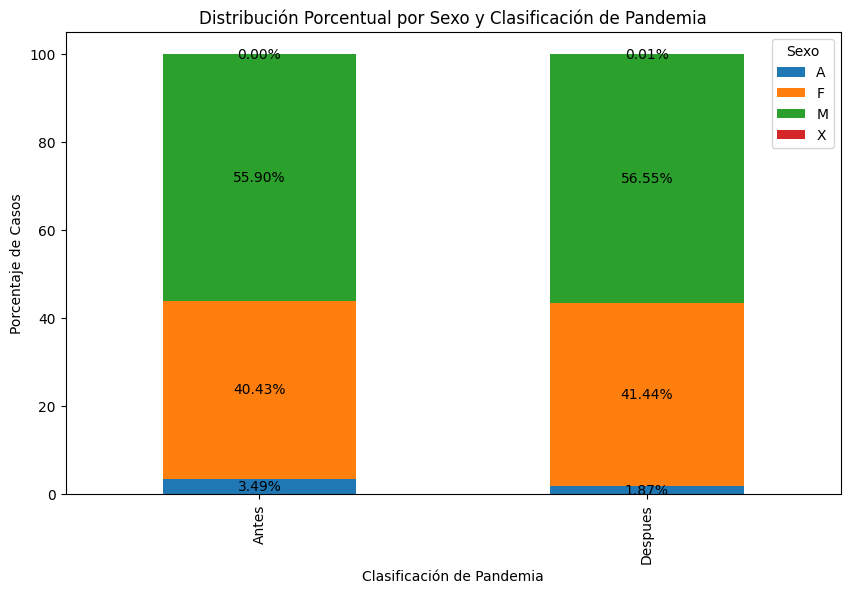

In [40]:

# Agrupar los datos por 'SEXO' y 'CLASIFICACION_PANDEMIA', y contar el número de casos en cada grupo
grupo_distribucion = base.groupby(['CLASIFICACION_PANDEMIA', 'SEXO']).size().unstack(fill_value=0)

# Calcular el total de casos por clasificación de pandemia
total_por_pandemia = base.groupby('CLASIFICACION_PANDEMIA').size()

# Calcular la distribución porcentual en lugar del conteo
distribucion_porcentual = grupo_distribucion.divide(total_por_pandemia, axis=0) * 100

# Crear un gráfico de barras apiladas con distribución porcentual
ax = distribucion_porcentual.plot(kind='bar', stacked=True, figsize=(10, 6))

# Configurar las etiquetas y el título del gráfico
plt.xlabel('Clasificación de Pandemia')
plt.ylabel('Porcentaje de Casos')
plt.title('Distribución Porcentual por Sexo y Clasificación de Pandemia')

# Agrega etiquetas de datos en las barras
for i, (idx, row) in enumerate(distribucion_porcentual.iterrows()):
    prev_label = 0
    for col in distribucion_porcentual.columns:
        porcentaje = row[col]
        ax.annotate(f'{porcentaje:.2f}%', xy=(i, prev_label + porcentaje / 2), ha='center', va='center')
        prev_label += porcentaje

# Agregar una leyenda
plt.legend(title='Sexo')

# Muestrar el gráfico
plt.show()




C:\Users\RominaSoledadDeLeon\AppData\Local\Temp\ipykernel_12316\3797809311.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_distribucion = base.groupby(['CLASIFICACION_PANDEMIA', 'GRUPO_EDAD']).size().unstack(fill_value=0)


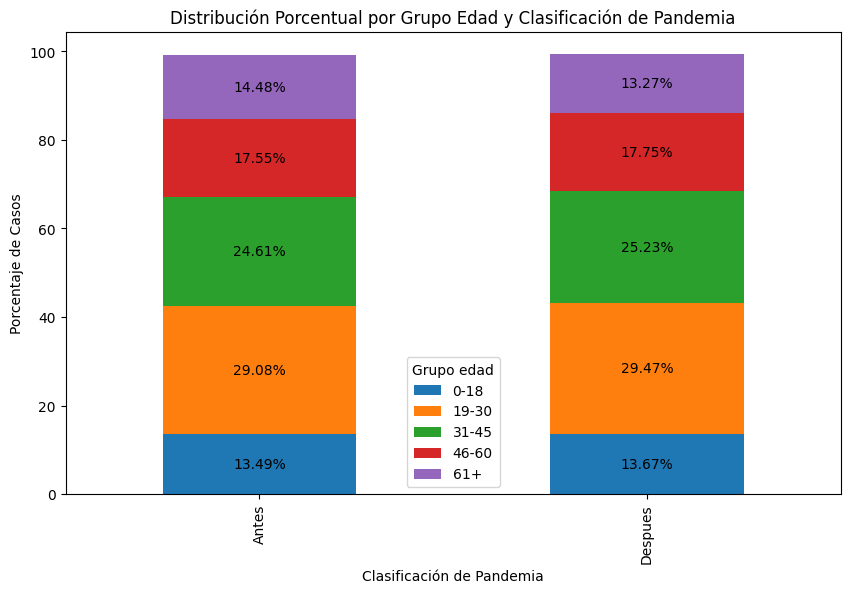

In [41]:

# Agrupar los datos por 'GRUPO EDAD' y 'CLASIFICACION_PANDEMIA', y contar el número de casos en cada grupo
grupo_distribucion = base.groupby(['CLASIFICACION_PANDEMIA', 'GRUPO_EDAD']).size().unstack(fill_value=0)

# Calcular el total de casos por clasificación de pandemia
total_por_pandemia = base.groupby('CLASIFICACION_PANDEMIA').size()

# Calcular la distribución porcentual en lugar del conteo
distribucion_porcentual = grupo_distribucion.divide(total_por_pandemia, axis=0) * 100

# Crear un gráfico de barras apiladas con distribución porcentual
ax = distribucion_porcentual.plot(kind='bar', stacked=True, figsize=(10, 6))

# Configurar las etiquetas y el título del gráfico
plt.xlabel('Clasificación de Pandemia')
plt.ylabel('Porcentaje de Casos')
plt.title('Distribución Porcentual por Grupo Edad y Clasificación de Pandemia')

# Agrega etiquetas de datos en las barras
for i, (idx, row) in enumerate(distribucion_porcentual.iterrows()):
    prev_label = 0
    for col in distribucion_porcentual.columns:
        porcentaje = row[col]
        ax.annotate(f'{porcentaje:.2f}%', xy=(i, prev_label + porcentaje / 2), ha='center', va='center')
        prev_label += porcentaje

# Agregar una leyenda
plt.legend(title='Grupo edad')

# Muestrar el gráfico
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


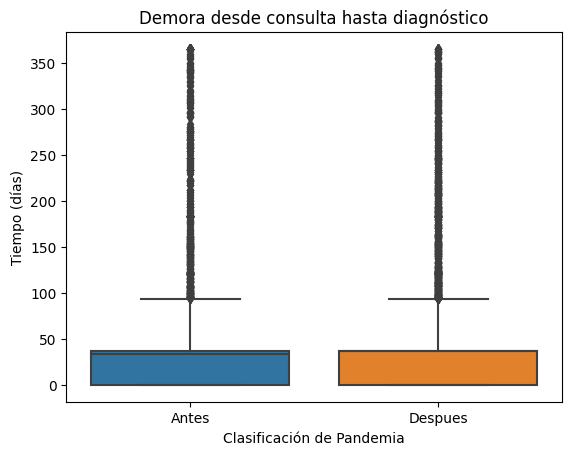

In [42]:
# Convertir la columna 'CLASIFICACION_PANDEMIA' en un tipo de datos categórico en el DataFrame original
base['CLASIFICACION_PANDEMIA'] = base['CLASIFICACION_PANDEMIA'].astype('category')

# Crear el diagrama de caja por categoría
sns.boxplot(x='CLASIFICACION_PANDEMIA', y='TIEMPO_DEMORA', data=base)

# Añadir título y etiquetas a los ejes
plt.title('Demora desde consulta hasta diagnóstico')
plt.xlabel('Clasificación de Pandemia')
plt.ylabel('Tiempo (días)')

# Mostrar el diagrama
plt.show()

TIEMPO DEMORA DESDE QUE EL PACIENTE INICIO CON LOS SINTOMAS HASTA QUE SE DIAGNOSTICO

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# Calcular las medidas de tendencia central para cada categoría segun clasificacion
valor_tiempo = round(base.groupby('CLASIFICACION_PANDEMIA')['TIEMPO_DEMORA'].agg(['mean', 'median']),2)


# Imprimir la tabla resumen
valor_tiempo

C:\Users\RominaSoledadDeLeon\AppData\Local\Temp\ipykernel_12316\864840934.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  valor_tiempo = round(base.groupby('CLASIFICACION_PANDEMIA')['TIEMPO_DEMORA'].agg(['mean', 'median']),2)


,mean,median
CLASIFICACION_PANDEMIA,,
Antes,27.56,34.00
Despues,29.22,37.29


In [44]:
# Calcular las medidas de tendencia central (media y mediana) para cada categoría según clasificación y provincia
valor_tiempo = round(base.groupby(['PROVINCIA_RESIDENCIA', 'CLASIFICACION_PANDEMIA'])['TIEMPO_DEMORA'].agg(['mean', 'median']).unstack(), 2)

# Renombrar las columnas
valor_tiempo.columns = ['Media_Antes', 'Media_Despues', 'Mediana_Antes', 'Mediana_Despues']

# Imprimir la tabla resumen
valor_tiempo




C:\Users\RominaSoledadDeLeon\AppData\Local\Temp\ipykernel_12316\2908731602.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  valor_tiempo = round(base.groupby(['PROVINCIA_RESIDENCIA', 'CLASIFICACION_PANDEMIA'])['TIEMPO_DEMORA'].agg(['mean', 'median']).unstack(), 2)


,Media_Antes,Media_Despues,Mediana_Antes,Mediana_Despues
PROVINCIA_RESIDENCIA,,,,
*sin dato*,15.79,29.11,0.00,37.29
Buenos Aires,26.72,27.92,37.29,37.29
Catamarca,27.87,11.17,37.29,0.00
Chaco,32.77,34.97,37.29,37.29
Chubut,22.93,18.88,8.00,1.00
Ciudad Autónoma de Buenos Aires,32.31,33.72,37.29,37.29
Corrientes,25.21,14.25,23.50,0.00
Córdoba,28.61,35.29,30.00,31.00
Entre Ríos,35.74,40.92,30.00,31.00


TIEMPO DEMORA DESDE QUE EL PACIENTE INICIO el TRATAMIENTO Y LO TERMINO

aca hay que tener en cuento la distribucion de la variable que se analiza simetrica (normal) asimetrico (no normal) si la media es mayor a la mediana y la moda por lo que se espera una distribución asimétrica a la derecha.

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


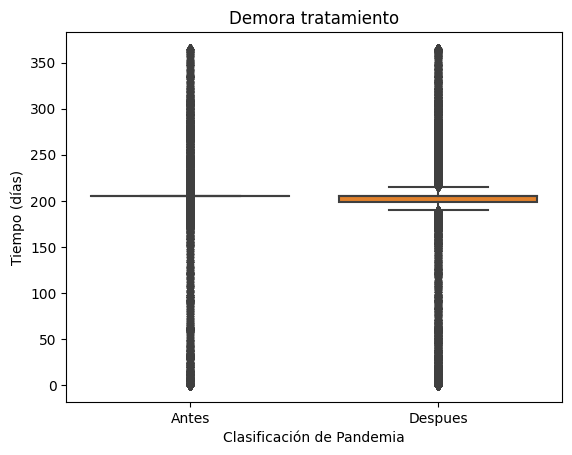

In [45]:

# Convertir la columna 'CLASIFICACION_PANDEMIA' en un tipo de datos categórico en el DataFrame original
base['CLASIFICACION_PANDEMIA'] = base['CLASIFICACION_PANDEMIA'].astype('category')


# Crear el diagrama de caja por categoría
sns.boxplot(x='CLASIFICACION_PANDEMIA', y='TIEMPO_DEMORA_TTO', data=base)

# Añadir título y etiquetas a los ejes
plt.title('Demora tratamiento')
plt.xlabel('Clasificación de Pandemia')
plt.ylabel('Tiempo (días)')

# Mostrar el diagrama
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

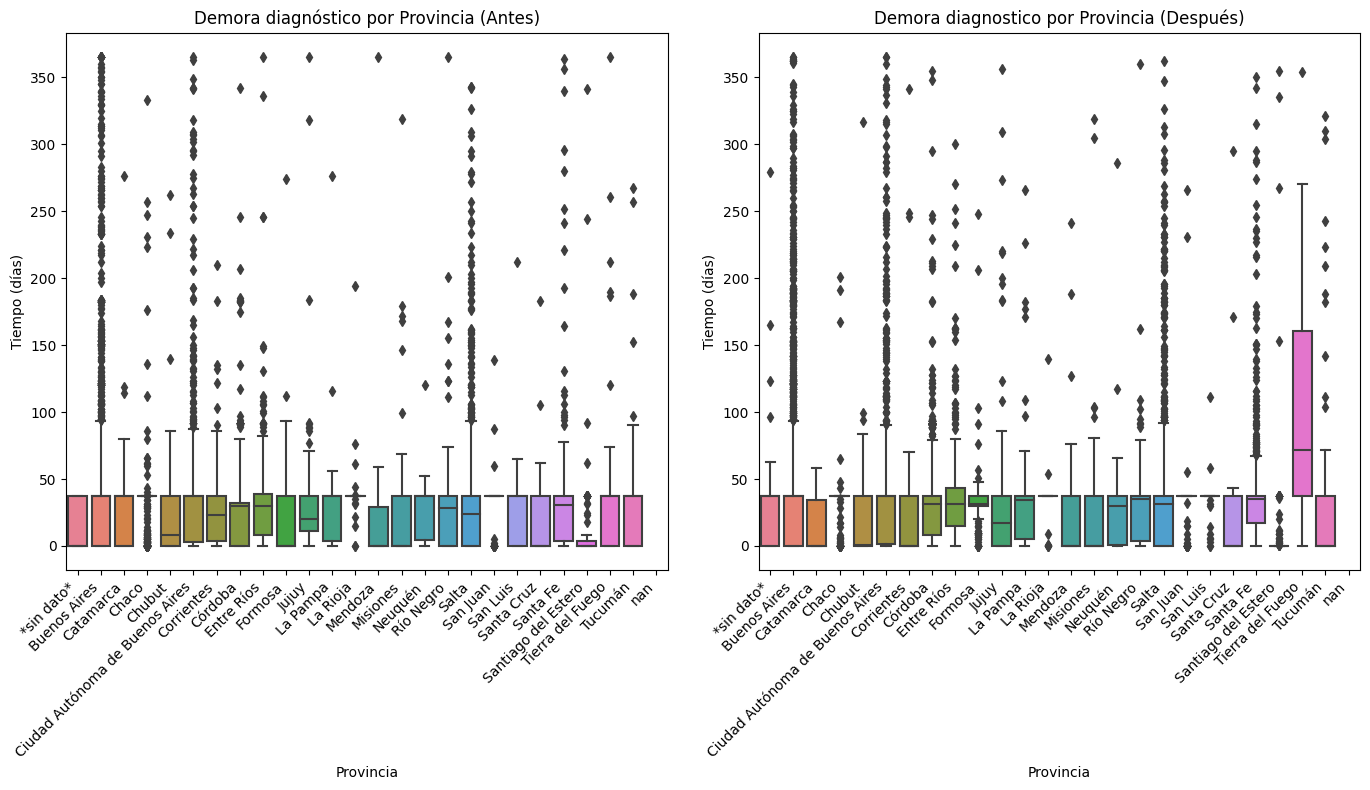

In [46]:
# Convertir la columna 'CLASIFICACION_PANDEMIA' en un tipo de datos categórico en el DataFrame original
base['CLASIFICACION_PANDEMIA'] = base['CLASIFICACION_PANDEMIA'].astype('category')

# Filtrar datos para 'Antes' y 'Después' de la clasificación de la pandemia
antes_pandemia = base[base['CLASIFICACION_PANDEMIA'] == 'Antes']
despues_pandemia = base[base['CLASIFICACION_PANDEMIA'] == 'Despues']

# Obtener las provincias únicas presentes en ambos grupos y ordenarlas alfabéticamente
provincias_disponibles = sorted(set(map(str, antes_pandemia['PROVINCIA_RESIDENCIA'])).intersection(set(map(str, despues_pandemia['PROVINCIA_RESIDENCIA']))))

# Crear una paleta de colores para que las provincias tengan el mismo color en ambos grupos
colores = sns.color_palette("husl", len(provincias_disponibles))

# Crear dos gráficos de caja separados
plt.figure(figsize=(14, 8))  # Ajustar el tamaño de la figura

# Gráfico para 'Antes'
plt.subplot(1, 2, 1)
sns.boxplot(x='PROVINCIA_RESIDENCIA', y='TIEMPO_DEMORA', data=antes_pandemia, order=provincias_disponibles, palette=colores)
plt.title('Demora diagnóstico por Provincia (Antes)')
plt.xlabel('Provincia')
plt.ylabel('Tiempo (días)')
plt.xticks(rotation=45, ha="right")  # Ajustar la rotación y alinear a la derecha

# Gráfico para 'Después'
plt.subplot(1, 2, 2)
sns.boxplot(x='PROVINCIA_RESIDENCIA', y='TIEMPO_DEMORA', data=despues_pandemia, order=provincias_disponibles, palette=colores)
plt.title('Demora diagnostico por Provincia (Después)')
plt.xlabel('Provincia')
plt.ylabel('Tiempo (días)')
plt.xticks(rotation=45, ha="right")  # Ajustar la rotación y alinear a la derecha

# Ajustar los márgenes para que los nombres de las provincias se vean mejor
plt.tight_layout()

# Mostrar los gráficos
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


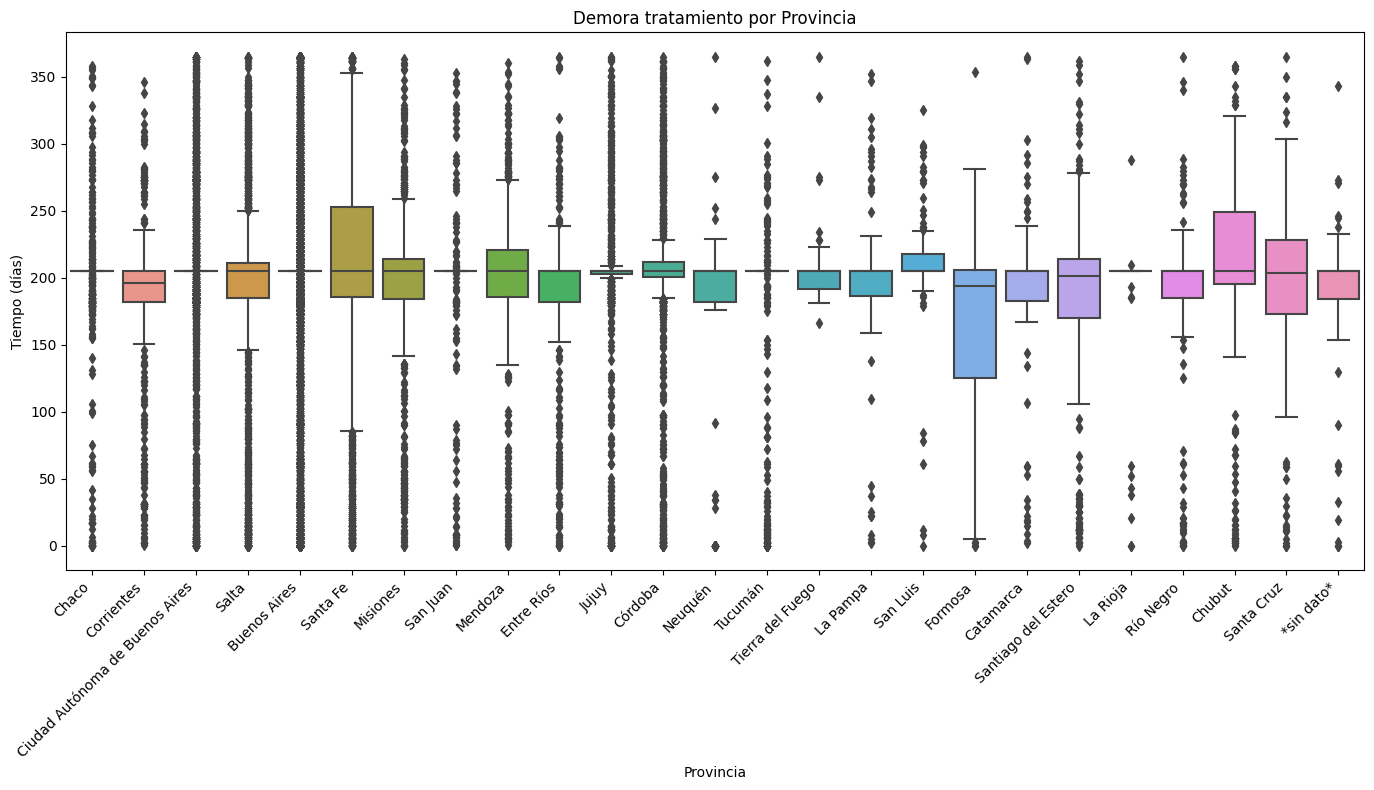

In [47]:

# Convertir la columna 'CLASIFICACION_PANDEMIA' en un tipo de datos categórico en el DataFrame original
base['CLASIFICACION_PANDEMIA'] = base['CLASIFICACION_PANDEMIA'].astype('category')

# Crear el diagrama de caja por provincia
plt.figure(figsize=(14, 8))  # Ajustar el tamaño de la figura
sns.boxplot(x='PROVINCIA_RESIDENCIA', y='TIEMPO_DEMORA_TTO', data=base)

# Añadir título y etiquetas a los ejes
plt.title('Demora tratamiento por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Tiempo (días)')

# Rotar las etiquetas del eje x para que sean legibles
plt.xticks(rotation=45, ha="right")  # Ajustar la rotación y alinear a la derecha

# Ajustar los márgenes para que los nombres de las provincias se vean mejor
plt.tight_layout()

# Mostrar el diagrama
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

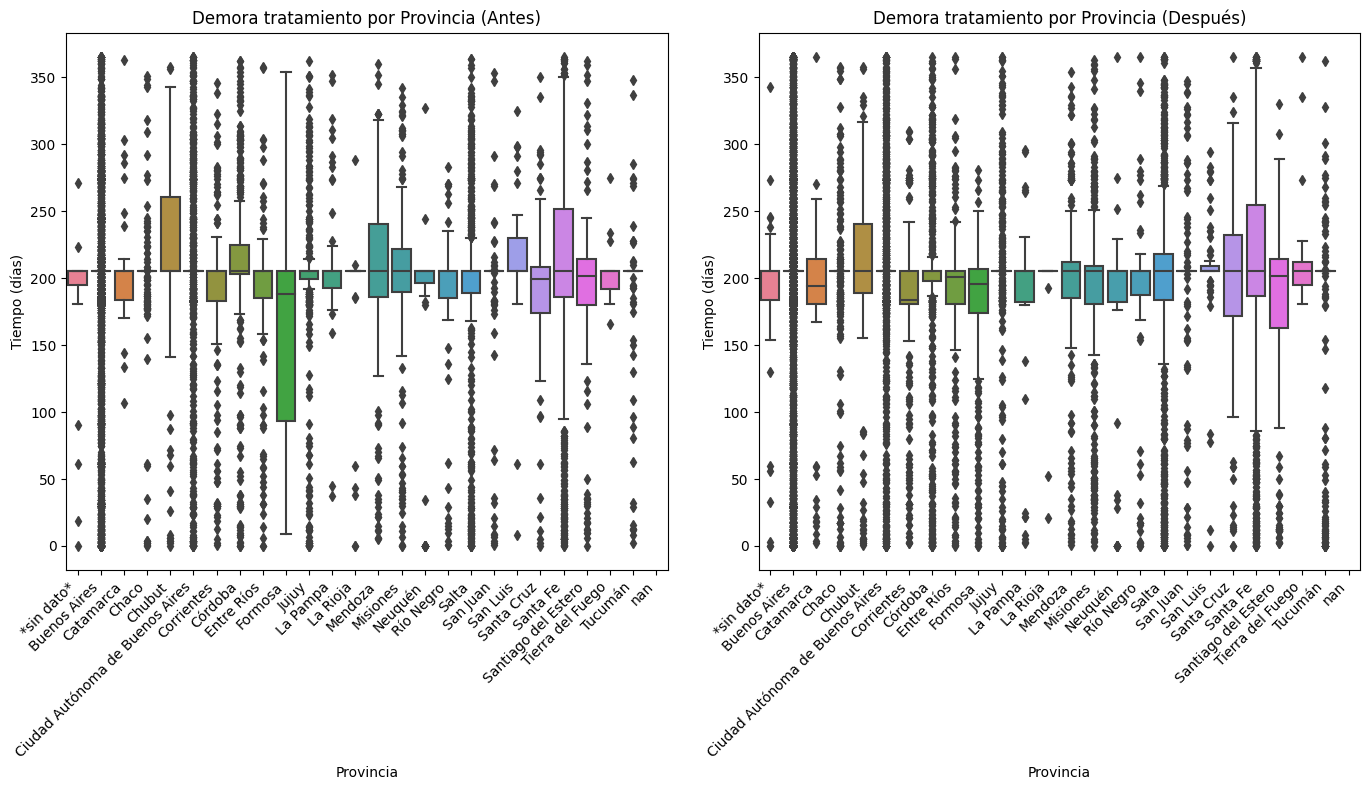

In [48]:
# Convertir la columna 'CLASIFICACION_PANDEMIA' en un tipo de datos categórico en el DataFrame original
base['CLASIFICACION_PANDEMIA'] = base['CLASIFICACION_PANDEMIA'].astype('category')

# Filtrar datos para 'Antes' y 'Después' de la clasificación de la pandemia
antes_pandemia = base[base['CLASIFICACION_PANDEMIA'] == 'Antes']
despues_pandemia = base[base['CLASIFICACION_PANDEMIA'] == 'Despues']

# Obtener las provincias únicas presentes en ambos grupos y ordenarlas alfabéticamente
provincias_disponibles = sorted(set(map(str, antes_pandemia['PROVINCIA_RESIDENCIA'])).intersection(set(map(str, despues_pandemia['PROVINCIA_RESIDENCIA']))))

# Crear una paleta de colores para que las provincias tengan el mismo color en ambos grupos
colores = sns.color_palette("husl", len(provincias_disponibles))

# Crear dos gráficos de caja separados
plt.figure(figsize=(14, 8))  # Ajustar el tamaño de la figura

# Gráfico para 'Antes'
plt.subplot(1, 2, 1)
sns.boxplot(x='PROVINCIA_RESIDENCIA', y='TIEMPO_DEMORA_TTO', data=antes_pandemia, order=provincias_disponibles, palette=colores)
plt.title('Demora tratamiento por Provincia (Antes)')
plt.xlabel('Provincia')
plt.ylabel('Tiempo (días)')
plt.xticks(rotation=45, ha="right")  # Ajustar la rotación y alinear a la derecha

# Gráfico para 'Después'
plt.subplot(1, 2, 2)
sns.boxplot(x='PROVINCIA_RESIDENCIA', y='TIEMPO_DEMORA_TTO', data=despues_pandemia, order=provincias_disponibles, palette=colores)
plt.title('Demora tratamiento por Provincia (Después)')
plt.xlabel('Provincia')
plt.ylabel('Tiempo (días)')
plt.xticks(rotation=45, ha="right")  # Ajustar la rotación y alinear a la derecha

# Ajustar los márgenes para que los nombres de las provincias se vean mejor
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [49]:
valor_tiempo_tto = round(base.groupby(['PROVINCIA_RESIDENCIA', 'CLASIFICACION_PANDEMIA'])['TIEMPO_DEMORA_TTO'].agg(['mean', 'median']).unstack(), 2)

# Renombrar las columnas
valor_tiempo_tto.columns = ['Media_Antes', 'Media_Despues', 'Mediana_Antes', 'Mediana_Despues']

# Imprimir la tabla resumen
valor_tiempo_tto

C:\Users\RominaSoledadDeLeon\AppData\Local\Temp\ipykernel_12316\1435971869.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  valor_tiempo_tto = round(base.groupby(['PROVINCIA_RESIDENCIA', 'CLASIFICACION_PANDEMIA'])['TIEMPO_DEMORA_TTO'].agg(['mean', 'median']).unstack(), 2)


,Media_Antes,Media_Despues,Mediana_Antes,Mediana_Despues
PROVINCIA_RESIDENCIA,,,,
*sin dato*,181.86,186.80,205.45,205.45
Buenos Aires,197.25,197.17,205.45,205.45
Catamarca,203.88,171.12,205.45,194.50
Chaco,203.17,198.38,205.45,205.45
Chubut,211.53,200.63,205.45,205.45
Ciudad Autónoma de Buenos Aires,205.04,204.54,205.45,205.45
Corrientes,189.59,180.54,205.45,184.00
Córdoba,207.06,194.14,205.45,205.45
Entre Ríos,190.02,182.04,205.45,201.00


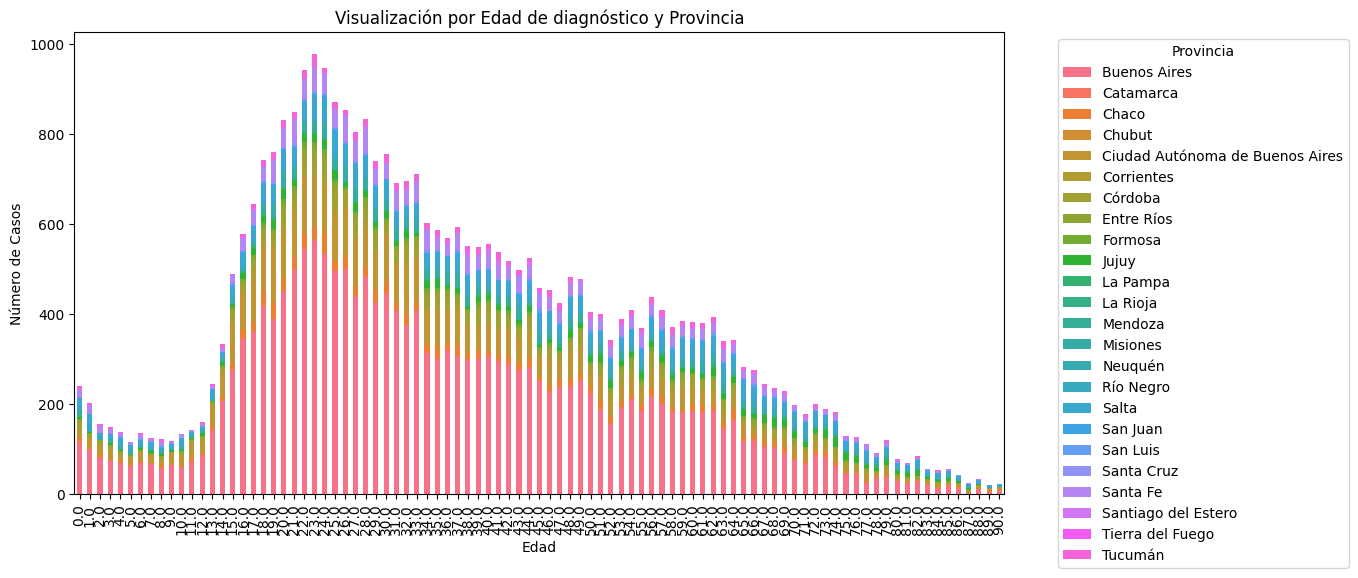

In [50]:
import matplotlib.pyplot as plt

paleta_colores = sns.color_palette('husl', n_colors=len(base['PROVINCIA_RESIDENCIA'].unique()))

# Por edad y provincias, contar las ocurrencias
agrupado = base[(~base['EDAD_DIAGNOSTICO'].isnull()) & (base['PROVINCIA_RESIDENCIA'] != "*sin dato*")].groupby(['EDAD_DIAGNOSTICO', 'PROVINCIA_RESIDENCIA']).size().unstack(fill_value=0)

# Crear un gráfico de barras apiladas
agrupado.plot(kind='bar', stacked=True, figsize=(12, 6), color=paleta_colores)
plt.title('Visualización por Edad de diagnóstico y Provincia')
plt.xlabel('Edad')
plt.ylabel('Número de Casos')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


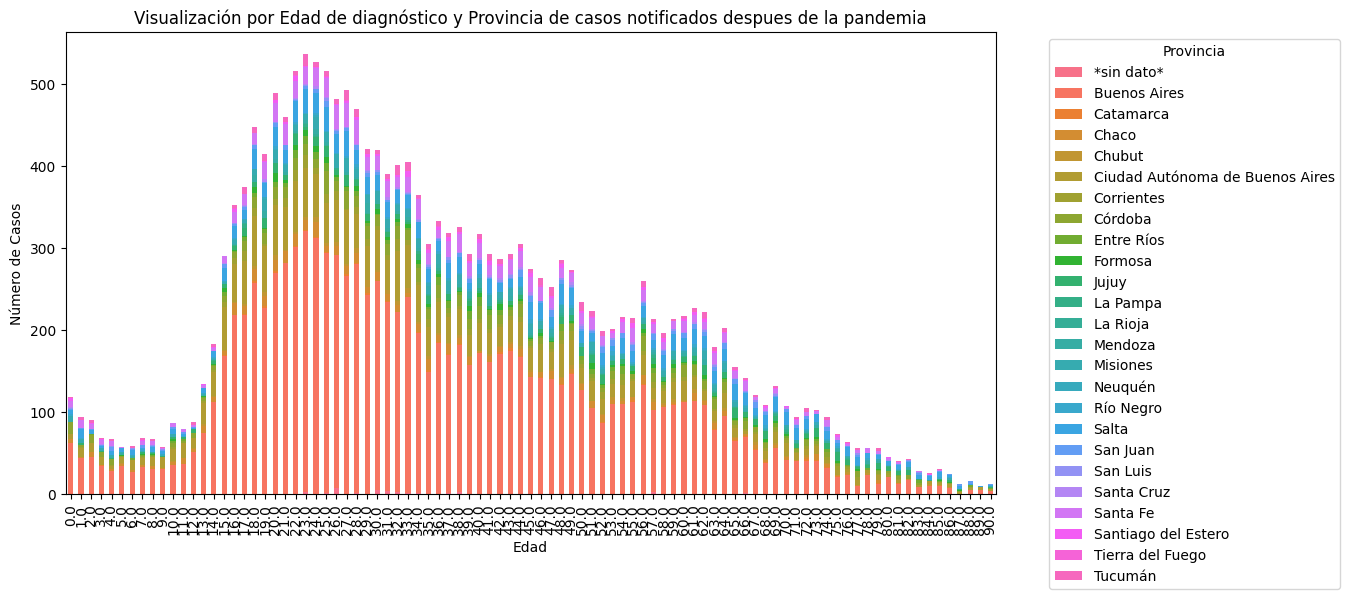

In [51]:
import matplotlib.pyplot as plt

paleta_colores = sns.color_palette('husl', n_colors=len(base['PROVINCIA_RESIDENCIA'].unique()))

# Por edad y provincias, contar las ocurrencias
agrupado = base[(~base['EDAD_DIAGNOSTICO'].isnull()) & (base['CLASIFICACION_PANDEMIA'] == "Despues")].groupby(['EDAD_DIAGNOSTICO', 'PROVINCIA_RESIDENCIA']).size().unstack(fill_value=0)

# Crear un gráfico de barras apiladas
agrupado.plot(kind='bar', stacked=True, figsize=(12, 6), color=paleta_colores)
plt.title('Visualización por Edad de diagnóstico y Provincia de casos notificados despues de la pandemia')
plt.xlabel('Edad')
plt.ylabel('Número de Casos')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

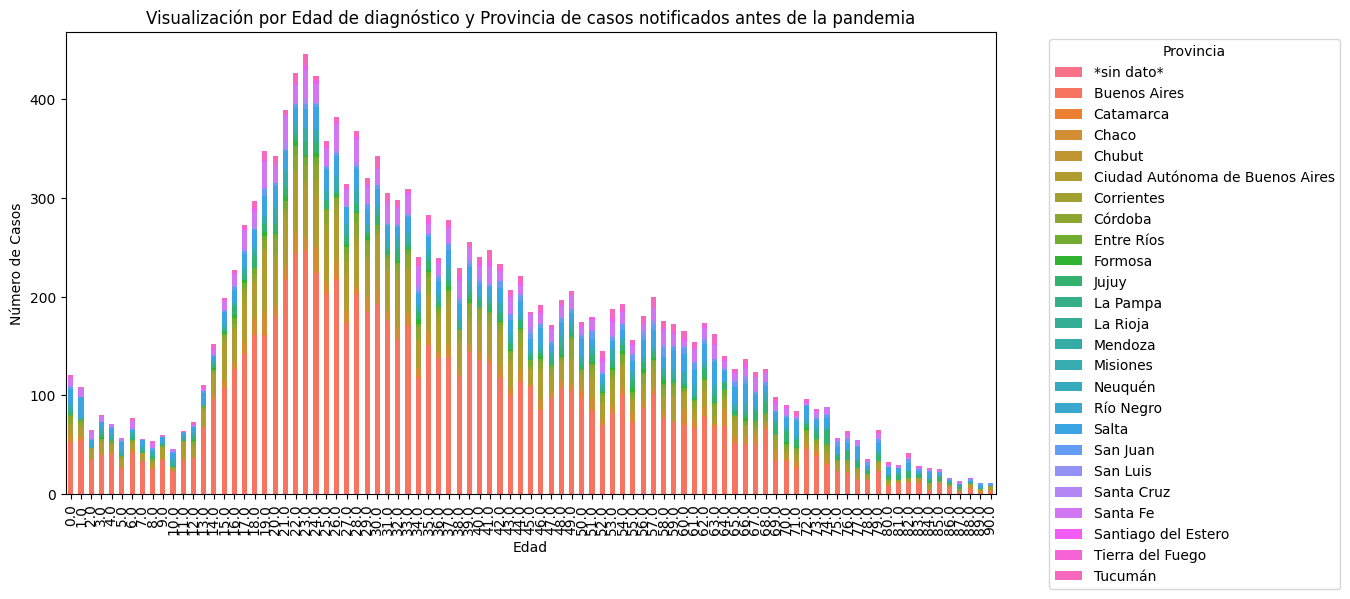

In [52]:
import matplotlib.pyplot as plt

paleta_colores = sns.color_palette('husl', n_colors=len(base['PROVINCIA_RESIDENCIA'].unique()))

# Por edad y provincias, contar las ocurrencias
agrupado = base[(~base['EDAD_DIAGNOSTICO'].isnull()) & (base['CLASIFICACION_PANDEMIA'] == "Antes")].groupby(['EDAD_DIAGNOSTICO', 'PROVINCIA_RESIDENCIA']).size().unstack(fill_value=0)

# Crear un gráfico de barras apiladas
agrupado.plot(kind='bar', stacked=True, figsize=(12, 6), color=paleta_colores)
plt.title('Visualización por Edad de diagnóstico y Provincia de casos notificados antes de la pandemia')
plt.xlabel('Edad')
plt.ylabel('Número de Casos')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [53]:
# Reemplazar "*sin dato*" con NaN (valores faltantes)
base['PROVINCIA_RESIDENCIA'] = base['PROVINCIA_RESIDENCIA'].replace('*sin dato*', pd.NA)

# Eliminar filas con NaN en 'PROVINCIA_RESIDENCIA'
base = base.dropna(subset=['PROVINCIA_RESIDENCIA'])

# Restablecer índice si es necesario
base = base.reset_index(drop=True)

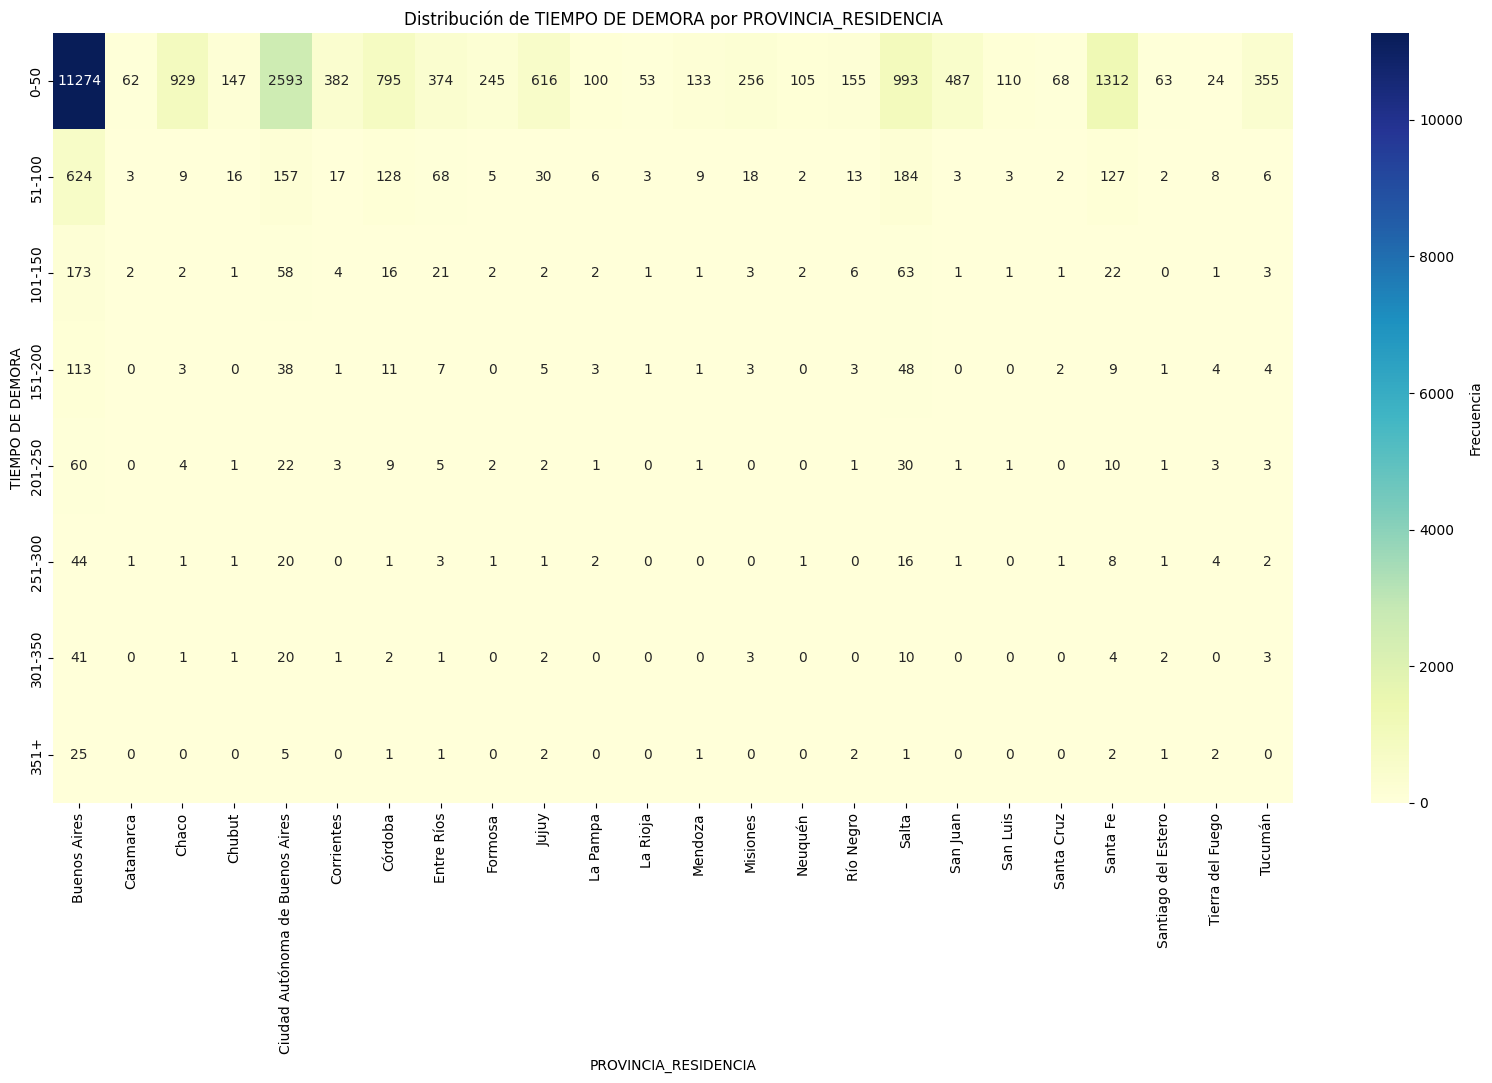

In [54]:
table1 = pd.crosstab(pd.cut(base['TIEMPO_DEMORA'], bins=[0, 50, 100, 150, 200, 250, 300, 350, float('inf')],
                            labels=['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351+']),
                     base['PROVINCIA_RESIDENCIA'])

# Graficar el histograma de barras apiladas
plt.figure(figsize=(20, 10))
sns.heatmap(table1, cmap='YlGnBu', annot=True, fmt='d', cbar=True, cbar_kws={'label': 'Frecuencia'})
plt.title('Distribución de TIEMPO DE DEMORA por PROVINCIA_RESIDENCIA')
plt.xlabel('PROVINCIA_RESIDENCIA')
plt.ylabel('TIEMPO DE DEMORA')

plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


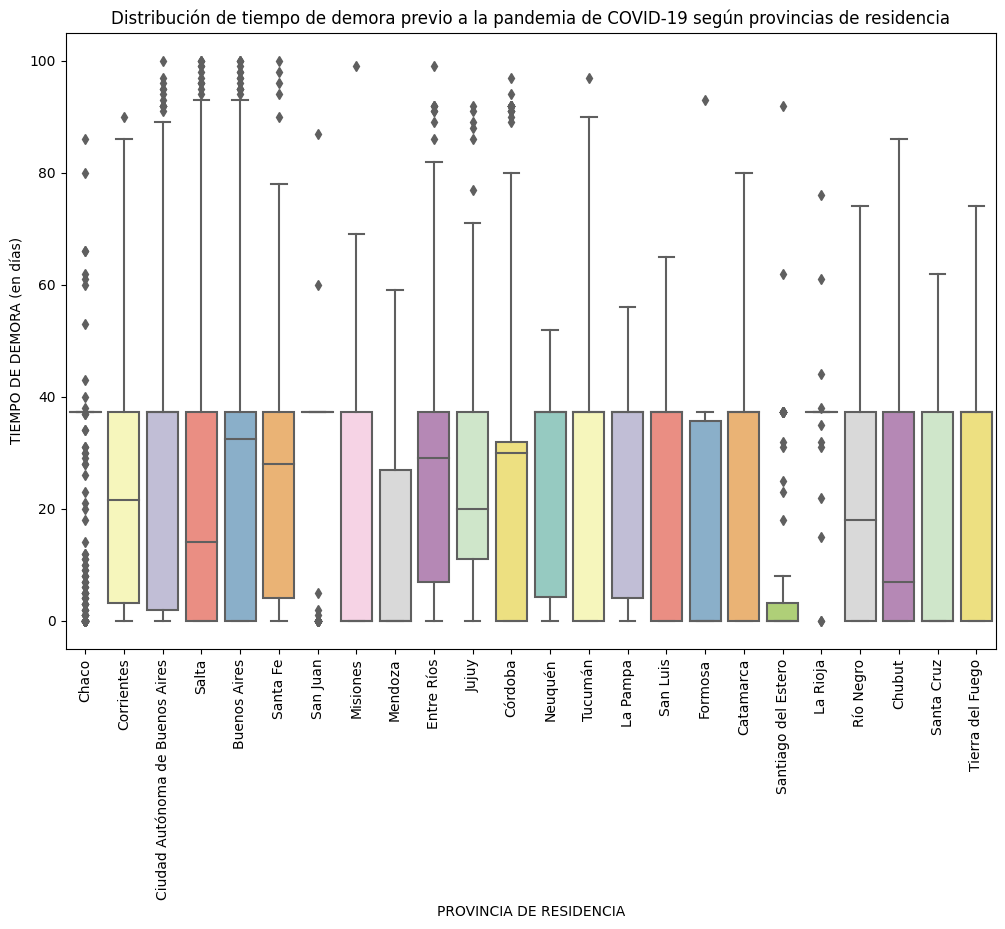

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el cuadro de cajas
plt.figure(figsize=(12, 8))
sns.boxplot(x='PROVINCIA_RESIDENCIA', y='TIEMPO_DEMORA', data=base[(base['TIEMPO_DEMORA'] <= 100) & (base['CLASIFICACION_PANDEMIA'] == 'Antes')],
            palette='Set3')
plt.title('Distribución de tiempo de demora previo a la pandemia de COVID-19 según provincias de residencia')
plt.xlabel('PROVINCIA DE RESIDENCIA')
plt.ylabel('TIEMPO DE DEMORA (en días)')
plt.xticks(rotation=90)
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


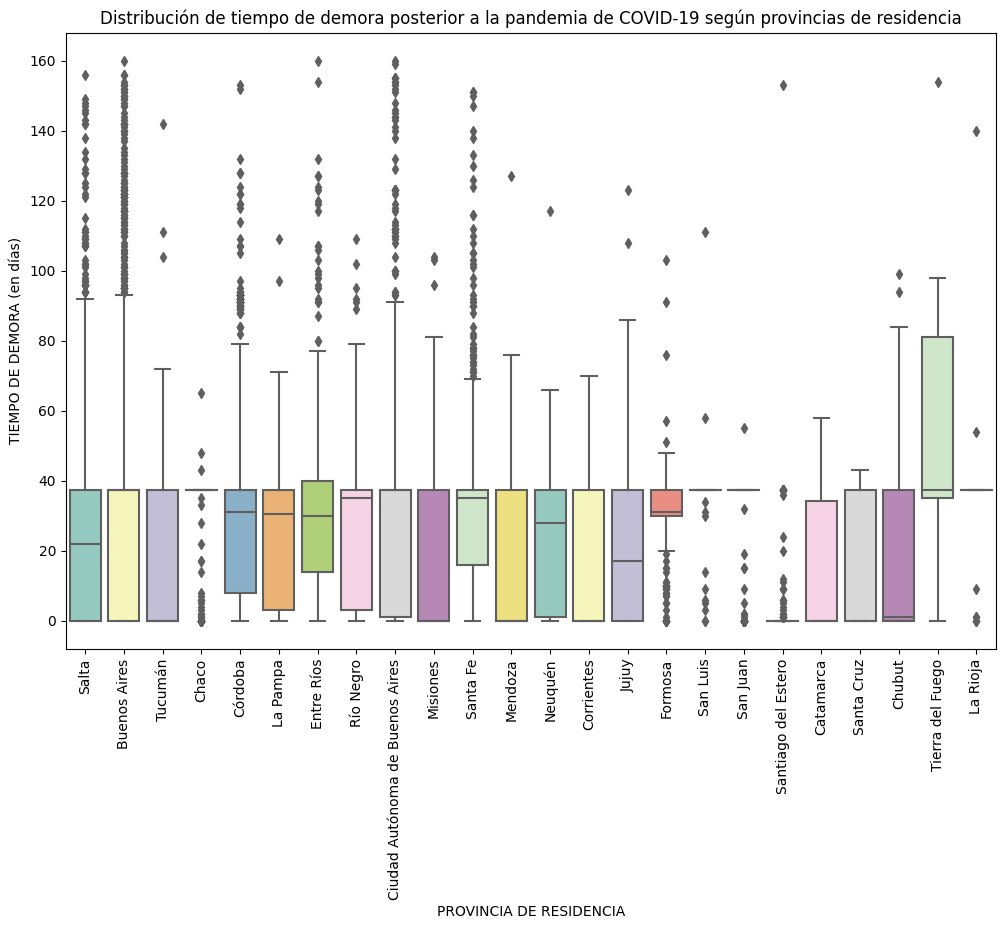

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el cuadro de cajas
plt.figure(figsize=(12, 8))
sns.boxplot(x='PROVINCIA_RESIDENCIA', y='TIEMPO_DEMORA', data=base[(base['TIEMPO_DEMORA'] <= 160) & (base['CLASIFICACION_PANDEMIA'] == 'Despues')],
            palette='Set3')
plt.title('Distribución de tiempo de demora posterior a la pandemia de COVID-19 según provincias de residencia')
plt.xlabel('PROVINCIA DE RESIDENCIA')
plt.ylabel('TIEMPO DE DEMORA (en días)')
plt.xticks(rotation=90)
plt.show()


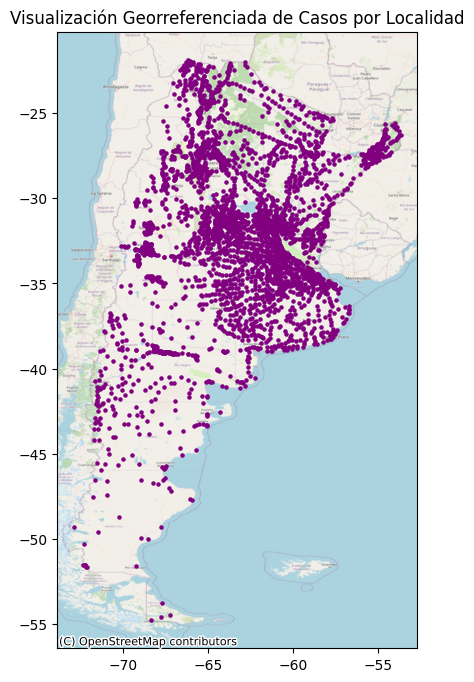

In [57]:
# URL del archivo GeoJSON
url = "https://infra.datos.gob.ar/catalog/modernizacion/dataset/7/distribution/7.31/download/localidades-censales.geojson"

# Descargo el geojson
response = requests.get(url)

# Guardo el archivo
with open("localidades-censales.geojson", "wb") as f:
    f.write(response.content)

# Cargop el archivo GeoJSON
gdf = gpd.read_file("localidades-censales.geojson")

# Fusiono gdf con base usando la columna 'nombre' para fusión
merged = gdf.merge(base, left_on='nombre', right_on='LOCALIDAD_RESIDENCIA')

# mapa de puntos
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, marker= 'o', color='purple', markersize=5)
ctx.add_basemap(ax, crs=merged.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)


plt.title('Visualización Georreferenciada de Casos por Localidad')
plt.show()


ANTES PANDEMIA POR LOCALIDAD

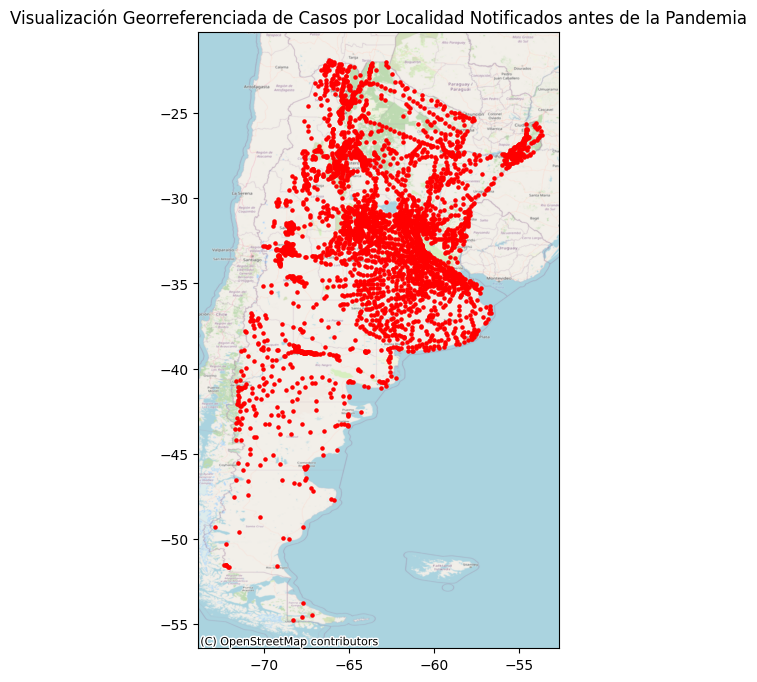

In [58]:
# URL del archivo GeoJSON
url = "https://infra.datos.gob.ar/catalog/modernizacion/dataset/7/distribution/7.31/download/localidades-censales.geojson"

# Descargo el geojson
response = requests.get(url)

# Guardo el archivo
with open("localidades-censales.geojson", "wb") as f:
    f.write(response.content)
#seleccionar solo los casos diagnosticados antes de la pandemia
datos_antes = base[base['CLASIFICACION_PANDEMIA'] == 'Antes']

# Cargop el archivo GeoJSON
gdf = gpd.read_file("localidades-censales.geojson")

# Fusiono gdf con base usando la columna 'nombre' para fusión
merged = gdf.merge(datos_antes, left_on='nombre', right_on='LOCALIDAD_RESIDENCIA')

# mapa de puntos
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, marker= 'o', color='red', markersize=5)
ctx.add_basemap(ax, crs=merged.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)


plt.title('Visualización Georreferenciada de Casos por Localidad Notificados antes de la Pandemia')
plt.show()

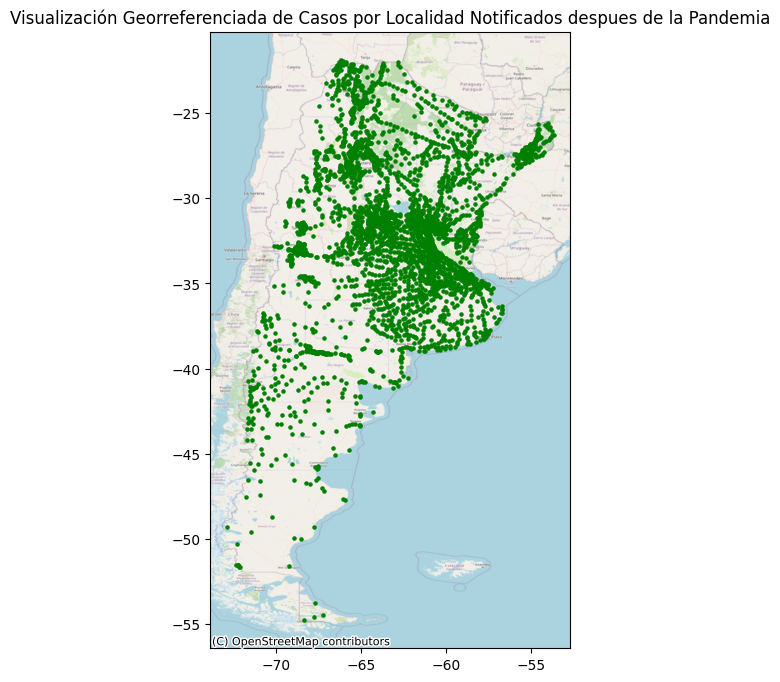

In [59]:
# URL del archivo GeoJSON
url = "https://infra.datos.gob.ar/catalog/modernizacion/dataset/7/distribution/7.31/download/localidades-censales.geojson"

# Descargo el geojson
response = requests.get(url)

# Guardo el archivo
with open("localidades-censales.geojson", "wb") as f:
    f.write(response.content)
#seleccionar solo los casos diagnosticados antes de la pandemia
datos_despues = base[base['CLASIFICACION_PANDEMIA'] == 'Despues']

# Cargop el archivo GeoJSON
gdf = gpd.read_file("localidades-censales.geojson")

# Fusiono gdf con base usando la columna 'nombre' para fusión
merged = gdf.merge(datos_despues, left_on='nombre', right_on='LOCALIDAD_RESIDENCIA')

# mapa de puntos
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, marker= 'o', color='green', markersize=5)
ctx.add_basemap(ax, crs=merged.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)


plt.title('Visualización Georreferenciada de Casos por Localidad Notificados despues de la Pandemia')
plt.show()

Georreferencia de cantidad de casos por provincia

ValueError: could not broadcast input array from shape (512,512,4) into shape (256,256,4)

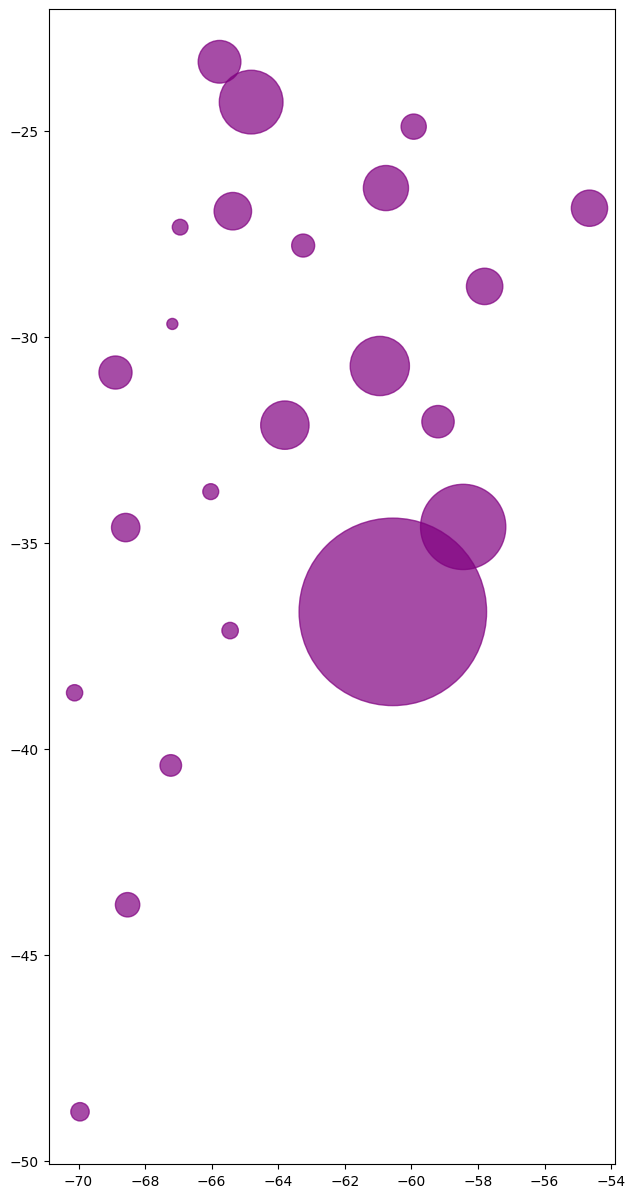

In [60]:
# URL del archivo GeoJSON
url = "https://infra.datos.gob.ar/catalog/modernizacion/dataset/7/distribution/7.12/download/provincias.geojson"

# Descargo el geojson
response = requests.get(url)

# Guardo el archivo
with open("provincias.geojson", "wb") as f:
    f.write(response.content)

# Cargop el archivo GeoJSON
gdf = gpd.read_file("provincias.geojson")

# Realizo el conteo por provincia_residencia en el DataFrame base
conteo_provincias = base['PROVINCIA_RESIDENCIA'].value_counts().reset_index()
conteo_provincias.columns = ['PROVINCIA_RESIDENCIA', 'CANTIDAD']

# Fusiono el GeoDataFrame con los datos de conteo
merged = gdf.merge(conteo_provincias, left_on='nombre', right_on='PROVINCIA_RESIDENCIA')

# Creo gráfico
fig, ax = plt.subplots(figsize=(20,15))

# Escalo según el tamaño de los marcadores según 'CANTIDAD'
scaled_marker_size = merged['CANTIDAD'] * 1

# Graficar el mapa de puntos con el tamaño de los marcadores escalado
merged.plot(ax=ax, color='purple', markersize=scaled_marker_size, alpha=0.7)

# Añadir un mapa de fondo (contextily)
ctx.add_basemap(ax, crs=merged.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

# Título del gráfico
plt.title('Cantidad de casos por Provincia de Residencia')

# Mostrar el gráfico
plt.show()


In [ ]:
# Crear una figura con dos subplots uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Filtrar datos para 'Antes' de la clasificación de la pandemia
datos_antes = base[base['CLASIFICACION_PANDEMIA'] == 'Antes']

# Realizar el conteo por provincia_residencia en los datos antes de la pandemia
conteo_provincias_antes = datos_antes['PROVINCIA_RESIDENCIA'].value_counts().reset_index()
conteo_provincias_antes.columns = ['PROVINCIA_RESIDENCIA', 'CANTIDAD']

# Fusionar el GeoDataFrame con los datos de conteo para 'Antes'
merged_antes = gdf.merge(conteo_provincias_antes, left_on='nombre', right_on='PROVINCIA_RESIDENCIA')

# Escalar el tamaño de los marcadores según 'CANTIDAD' para 'Antes'
scaled_marker_size_antes = merged_antes['CANTIDAD'] * 1

# Graficar el mapa de puntos para 'Antes'
merged_antes.plot(ax=axes[0], color='red', markersize=scaled_marker_size_antes, alpha=0.7)
ctx.add_basemap(axes[0], crs=merged_antes.crs.to_string(), source=ctx.providers.Stamen.TonerLite)
axes[0].set_title('Cantidad de casos por Provincia de Residencia (Antes de la pandemia)')
axes[0].set_aspect('equal', adjustable='datalim')  # Añadir adjustable para ajuste automático

# Filtrar datos para 'Después' de la clasificación de la pandemia
datos_despues = base[base['CLASIFICACION_PANDEMIA'] == 'Despues']

# Realizar el conteo por provincia_residencia en los datos después de la pandemia
conteo_provincias_despues = datos_despues['PROVINCIA_RESIDENCIA'].value_counts().reset_index()
conteo_provincias_despues.columns = ['PROVINCIA_RESIDENCIA', 'CANTIDAD']

# Fusionar el GeoDataFrame con los datos de conteo para 'Después'
merged_despues = gdf.merge(conteo_provincias_despues, left_on='nombre', right_on='PROVINCIA_RESIDENCIA')

# Escalar el tamaño de los marcadores según 'CANTIDAD' para 'Después'
scaled_marker_size_despues = merged_despues['CANTIDAD'] * 1

# Graficar el mapa de puntos para 'Después'
merged_despues.plot(ax=axes[1], color='green', markersize=scaled_marker_size_despues, alpha=0.7)
ctx.add_basemap(axes[1], crs=merged_despues.crs.to_string(), source=ctx.providers.Stamen.TonerLite)
axes[1].set_title('Cantidad de casos por Provincia de Residencia (Después de la pandemia)')
axes[1].set_aspect('equal', adjustable='datalim')  # Añadir adjustable para ajuste automático

# Mostrar los gráficos uno al lado del otro
plt.tight_layout()
plt.show()



Antes de hacer el análisis de covarianza, generamos un nuevo df quedándonos sólo con las variables que consideramos que más aportan al análisis


In [ ]:
base.columns

#Analisis de covarianza entre las variables

In [ ]:
base.plot(kind='scatter',x='TIEMPO_DEMORA_TTO',y='TIEMPO_DEMORA',grid=True,figsize=(20,10))

In [ ]:
base.plot(kind='scatter',x='EDAD_DIAGNOSTICO',y='TIEMPO_DEMORA',grid=True,figsize=(20,10))

In [ ]:
df_cuantitativas =base[['TIEMPO_DEMORA', 'TIEMPO_DEMORA_TTO','EDAD_DIAGNOSTICO']]

In [ ]:
sns.pairplot(df_cuantitativas)

In [ ]:
# Filtrar los datos para "Antes" y "Después"
datos_antes = base[base['CLASIFICACION_PANDEMIA'] == 'Antes']
datos_despues = base[base['CLASIFICACION_PANDEMIA'] == 'Despues']

# Suponiendo que tienes un DataFrame llamado df con las variables cuantitativas
df_cuantitativas_antes = datos_antes[['TIEMPO_DEMORA', 'TIEMPO_DEMORA_TTO', 'EDAD_DIAGNOSTICO']]  # Reemplaza con tus variables
df_cuantitativas_despues = datos_despues[['TIEMPO_DEMORA', 'TIEMPO_DEMORA_TTO', 'EDAD_DIAGNOSTICO']]  # Reemplaza con tus variables

# Crear pairplot para "Antes"
sns.set(style="ticks")
g = sns.pairplot(df_cuantitativas_antes)
g.fig.suptitle('Pairplot para el grupo Antes de la pandemia', y=1.02)
plt.show()

# Crear pairplot para "Después"
sns.set(style="ticks")
g = sns.pairplot(df_cuantitativas_despues)
g.fig.suptitle('Pairplot para el grupo Después de la pandemia', y=1.02)
plt.show()


Análisis de covarianza entre las variables.
Del análisis de la covarianza se puede ver que edad tiene una covarianza positiva con tiempo de demora del diagnostico y negativa con tiempo de demora del trataeminto (MAYOR EDAD MENOR TIEMPO TTO Y MAYOR EDAD MAYOR TIEMPO DE DIAGNOSTICO??) Y esto se observa la misma covarianza por grupos.

In [ ]:
sns.heatmap(df_cuantitativas.corr(),annot=True)

In [ ]:
sns.heatmap(df_cuantitativas_antes.corr(),annot=True)

In [ ]:
sns.heatmap(df_cuantitativas_despues.corr(),annot=True)

#Aprendizaje supervisado:

Para predecir la demora en el diagnóstico.

Regresión lineal multivariado
Aplicamos un modelo de regresión lineal MULTIVARIADO buscando predecir el teimpo de demora del tratamiento según la edad del paciente y tiempo de demora del diagnostico

In [ ]:
!pip install statsmodels

In [ ]:
#Importamos el módulo que necesitamos
import statsmodels.formula.api as smf

#Construimos el modelo.
lm = smf.ols(formula='TIEMPO_DEMORA_TTO''~EDAD_DIAGNOSTICO + TIEMPO_DEMORA',data=df_cuantitativas).fit()

In [ ]:
y = np.array(df_cuantitativas['TIEMPO_DEMORA_TTO'])

In [ ]:
print(lm.summary())

R-cuadrado: Un valor de 0.005 indica que aproximadamente el 0.5% de la variabilidad en la variable "demora en el tratamiento" se puede explicar mediante las variables incluidas en el modelo. En otras palabras, solo una pequeña fracción de la variabilidad en la demora del tratamiento se puede atribuir a las variables independientes en el modelo. Esto sugiere que las variables incluidas en el modelo tienen una relación muy débil con la demora en el tratamiento.

R-cuadrado ajustado: Un valor de 0.005 también indica que el ajuste del modelo no mejora al considerar el número de variables y observaciones. Esto significa que agregar más variables al modelo no aumentará significativamente la capacidad del modelo para explicar la variabilidad en la demora del tratamiento.

Valor p: El valor p muy pequeño (2.88e-41) sugiere que hay evidencia significativa para rechazar la hipótesis nula de que no hay relación lineal entre las variables independientes y la variable dependiente. Esto indica que hay una relación estadísticamente significativa entre las variables independientes (como la edad del paciente y el tiempo de diagnóstico) y la demora en el tratamiento. Sin embargo, es importante tener en cuenta que aunque la relación es significativa desde el punto de vista estadístico, el valor de R-cuadrado es muy bajo, lo que sugiere que la relación es débil en términos prácticos.

**Aunque existe una relación estadísticamente significativa entre las variables independientes y la demora en el tratamiento, esta relación es muy débil y explica solo una pequeña parte de la variabilidad observada en la demora del tratamiento. Por lo tanto, es posible que otros factores no incluidos en el modelo también influyan en la demora en el tratamiento.**

#ANTES

In [ ]:
#Construimos el modelo.
lm_antes = smf.ols(formula='TIEMPO_DEMORA_TTO''~EDAD_DIAGNOSTICO + TIEMPO_DEMORA',data=df_cuantitativas_antes).fit()
y_antes = np.array(df_cuantitativas_antes['TIEMPO_DEMORA_TTO'])
print(lm_antes.summary())

#DESPUES

In [ ]:
#Construimos el modelo.
lm_despues = smf.ols(formula='TIEMPO_DEMORA_TTO''~EDAD_DIAGNOSTICO + TIEMPO_DEMORA',data=df_cuantitativas_despues).fit()
y_despues = np.array(df_cuantitativas_despues['TIEMPO_DEMORA_TTO'])
print(lm_antes.summary())



---



---


**Bosques aleatorios para árboles de regresión.**


---

---


In [ ]:
#Vamos a buscar el método adecuado
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Generamos nuestra instancia
#En el parámetro n_estimators le decimos la cantidad de árboles aleatorios queremos que genere.
forest1= RandomForestRegressor(n_jobs=2,oob_score=True,n_estimators=5000)

Esto hice para indicar que solo tome las columnas que tienen valores numéricos, no me quedó claro si estaría bien

In [ ]:
X = base.copy()
tipos_a_mantener = ['int64', 'float64']

# Seleccionar las columnas que son de los tipos especificados
X = X.select_dtypes(include=tipos_a_mantener)
y = base['TIEMPO_DEMORA']  # Definir la columna objetivo

In [ ]:
X = X.dropna(axis=1)

In [ ]:
y = y.dropna()

In [ ]:
#Ajustamos nuestro modelo
forest1.fit(X,y)

In [ ]:
#Podemos ver nuestras predicciones.
forest1.oob_prediction_[:10]

In [ ]:
print(" El r2 del modelo es: " , forest1.score(X, y))

El R2 de los bosques aleatorios para árbol de regresión nos da 0.85 es decir que aproximadamente el 85 % de la variabilidad de los valores de respuesta se explica por las variables predictoras utilizadas en el modelo.

Esta alta proporción de variabilidad sugiere que el modelo de bosques aleatorios tiene un buen ajuste a los datos y es capaz de capturar la relación entre las variables predictoras y la de respuesta.

En otras palabras, el modelo es capaz de predecir con bastante precisión los valores de la variable de respuesta basándose en las variables predictoras.


---


**Clasificación - KNN**


---


El algoritmo k-NN es un método de aprendizaje supervisado que clasifica los puntos de datos en función de la mayoría de votos de sus k vecinos más cercanos en el espacio de características. Es sencillo de entender e implementar, y puede funcionar bien en conjuntos de datos pequeños. Sin embargo, puede ser computacionalmente costoso para conjuntos de datos grandes y puede no funcionar bien cuando los datos tienen características irrelevantes o ruido.
Los algoritmos de clasificación se utilizan cuando el resultado deseado es una etiqueta discreta.

In [ ]:
#librerias necesarias
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import preprocessing,neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Selecciona las variables independientes (dependientes) que deseas utilizar
variables_independientes = ['TIEMPO_DEMORA', 'TIEMPO_DEMORA_TTO', 'SEXO', 'EDAD_DIAGNOSTICO', 'PROVINCIA_RESIDENCIA']
X = base[variables_independientes]

# La variable predictora es 'CLASIFICACION_PANDEMIA'
y = base['CLASIFICACION_PANDEMIA']

# Codifica las variables categóricas (como 'SEXO' y 'PROVINCIA') en variables numéricas
X_encoded = pd.get_dummies(X, columns=['SEXO', 'PROVINCIA_RESIDENCIA'], drop_first=True)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Estandariza las variables numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicializa y entrena el modelo de Regresión Logística multinomial
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Etiquetas de clases
clases = ['Antes', 'Después']

# Rendimiento del modelo
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=clases)

# Imprimir métricas de rendimiento con etiquetas
print("Matriz de Confusión:")
confusion_df = pd.DataFrame(confusion, index=clases, columns=clases)
print(confusion_df)
print("\nReporte de Clasificación:")
print(classification_rep)



El informe de clasificación proporciona métricas detalladas sobre el rendimiento del modelo de clasificación para cada clase (en este caso, "Antes" y "Después"). Interpretación de las métricas en el reporte:
- "Antes": Precisión (precisión): 0.57. Esto significa que el 57% de las predicciones que el modelo hizo para la clase "Antes" fueron correctas. Recall: 0,07. (también llamado sensibilidad o tasa de verdaderos positivos) es bajo, lo que indica que el modelo solo pudo identificar el 7% de todos los casos reales de "Antes". Puntuación F1 (f1-score): 0,12. La puntuación F1 es una medida que combina precisión y recuperación en una sola métrica. En este caso, es baja, lo que indica un bajo equilibrio entre precisión y recuperación."
-"Despues": Precisión (precisión): 0.56. Esto significa que el 56% de las predicciones que el modelo hizo para la clase "Despues" fueron correctas. Recall: 0,96. (también llamado sensibilidad o tasa de verdaderos positivos) es bajo, lo que indica que el modelo pudo identificar el 96% de todos los casos reales de "Despues". Puntuación F1 (f1-score): 0,71. La puntuación F1 es una medida que combina precisión y recuperación en una sola métrica. En este caso, es alta, lo que indica un alto equilibrio entre precisión y recuperación para los casos de despues."

**En general, estas métricas reflejan que el modelo es mucho más efectivo en la clasificación de la clase "Después" en comparación con la clase "Antes". El modelo tiene un buen equilibrio entre precisión y recuperación para "Después", mientras que su rendimiento en "Antes" es deficiente en términos de recuperación y, por lo tanto, en la identificación de los casos de "Antes". Esto sugiere que puede ser necesario ajustar o mejorar el modelo para tratar mejor la clase "Antes" si es importante en el contexto del problema.**





In [ ]:
base.columns




#Aprendizaje no supervisado:

El aprendizaje no supervisado puede ser útil para identificar patrones en los datos. Podrías usar técnicas de clustering como K-means para agrupar pacientes en función de características similares, lo que podría ayudar a identificar subgrupos de pacientes con demoras similares en el diagnóstico.

In [ ]:
df_K =base[['TIEMPO_DEMORA', 'TIEMPO_DEMORA_TTO','EDAD_DIAGNOSTICO', 'CLASIFICACION_PANDEMIA']]

In [ ]:
sns.pairplot(df_K,hue = 'CLASIFICACION_PANDEMIA')

## No sé si sirven de mucho!

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un objeto de grafo
G = nx.Graph()

# Obtener listas únicas de grupos de edad y provincias de residencia
grupos_de_edad = base['GRUPO_EDAD'].unique()
provincias_residencia = base['PROVINCIA_RESIDENCIA'].unique()

# Agregar nodos para grupos de edad
for grupo in grupos_de_edad:
    G.add_node(grupo, tipo='Grupo de Edad', color='purple')  # Puedes personalizar el color aquí

# Agregar nodos para provincias de residencia
for provincia in provincias_residencia:
    G.add_node(provincia, tipo='Provincia de Residencia', color='blue')  # Puedes personalizar el color aquí

# Agregar aristas para representar relaciones
for _, row in base.iterrows():
    G.add_edge(row['GRUPO_EDAD'], row['PROVINCIA_RESIDENCIA'])

# Obtener colores de nodos basados en el atributo 'color'
node_colors = [G.nodes[node]['color'] for node in G.nodes]

fig, ax = plt.subplots(figsize=(12, 8))

# Dibujar el grafo con colores personalizados
pos = nx.spring_layout(G, seed=42)  # Colocación de nodos en el plano
nx.draw_networkx_nodes(G, pos, node_size=120, node_color=node_colors, cmap=plt.cm.Reds_r)

# Dibujar el resto del grafo
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', font_weight='light')
# Dibujar las aristas
for edge in G.edges:
    nx.draw_networkx_edges(G, pos, edgelist=[edge], edge_color='aquamarine')


# Mostrar el grafo
plt.title("Relaciones entre provincias de residencia y grupos de edad representado con grafos")
plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un objeto de grafo
G = nx.Graph()

# Agregar nodos para CLASIFICACION_PANDEMIA
clasificacion_pandemia_values = base['CLASIFICACION_PANDEMIA'].unique()
for clasificacion_pandemia in clasificacion_pandemia_values:
    G.add_node(clasificacion_pandemia, tipo='Clasificación Pandemia')

# Agregar nodos para PROVINCIA_RESIDENCIA
provincia_residencia_values = base['PROVINCIA_RESIDENCIA'].unique()
for provincia_residencia in provincia_residencia_values:
    G.add_node(provincia_residencia, tipo='Provincia de Residencia')

# Asignar colores directamente a las categorías 'Antes' y 'Después' de 'CLASIFICACION_PANDEMIA'
colores = {'Antes': 'red', 'Despues': 'blue'}

# Agregar aristas según alguna lógica específica (aquí, un ejemplo simple)
for _, row in base.iterrows():
    G.add_edge(row['CLASIFICACION_PANDEMIA'], row['PROVINCIA_RESIDENCIA'])

# Obtener los colores de los nodos en función de 'CLASIFICACION_PANDEMIA'
node_colors = [colores.get(clasificacion, 'purple') for clasificacion in G.nodes]

fig, ax = plt.subplots(figsize=(12, 8))

# Dibujar el grafo con colores asignados
pos = nx.spring_layout(G, seed=42)

nx.draw_networkx(G, pos, with_labels=True, node_size=350, node_color=node_colors, font_size=12, font_color='grey', font_weight='light')
plt.title("Grafo de Nodos y Aristas")
plt.show()
